In [ ]:
# Essential Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from scipy import stats

# Set visualization style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress font warnings for emojis
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/dune_data.csv')

In [3]:
print(f"\n Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")


 Dataset Shape: 2000 rows × 8 columns


In [4]:
print(df.dtypes)

active_weeks                        int64
target_variable                    object
total_volume                      float64
trader_activity_status             object
trader_volume_status               object
trader_weekly_frequency_status     object
tx_count_365d                       int64
wallet                             object
dtype: object


In [5]:
df.head()

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,wallet
0,1,🔴 Bad Trader,38.726119,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,2,0xa3c6acd45396110466fd8972875b3e6d33a0b0b8
1,1,🔴 Bad Trader,135.943754,🐣 Occasional User,🐟 Middle Value Trader,🐣 Unserious,1,0xbc0452c93e33b886d0e6750a9fc261e1d3c877ed
2,1,🔴 Bad Trader,0.457897,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1,0x477b0f0e29494a1e108a302ffecff3d76663386c
3,5,🔴 Bad Trader,37.614307,🐤 Regular User,🦐 Low Value Trader,🐦 OG,8,0x02170d140c843646d4802f6e65f9236baccc2f70
4,1,🔴 Bad Trader,2.389608,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1,0xcb69aceac5956af777d4d77c8d01c1fdea5828bd


In [6]:
df.tail()

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,wallet
1995,1,🔴 Bad Trader,30.584974,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1,0x05a3f364d84287eb3b18757643f47cd507b58438
1996,1,🔴 Bad Trader,0.109873,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1,0x8eb4cddb7e78fb0d5ebb75670122d2271de652a4
1997,1,🔴 Bad Trader,0.827270,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,2,0x9ef6be20528016d65e16900cb0392eb259a743ac
1998,1,🔴 Bad Trader,200.986683,🐤 Regular User,🐟 Middle Value Trader,🐣 Unserious,2,0xabaef3332e1440b3585a7ceebd6b674fbd0253f9
1999,1,🔴 Bad Trader,4.441506,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,3,0x3f490686ae0a68fd720b293b2d225bff8fd7761e


In [7]:
df.describe()

,active_weeks,total_volume,tx_count_365d
count,2000.000000,2.000000e+03,2000.000000
mean,7.452000,1.381682e+05,130.254500
std,9.820281,2.388449e+06,2702.634291
min,1.000000,3.873770e-07,1.000000
25%,1.000000,3.383906e+01,2.000000
50%,3.000000,3.327111e+02,6.000000
75%,10.000000,5.036433e+03,26.000000
max,53.000000,8.256017e+07,113968.000000


Their is an Indication of outliers in the dataset
- Active weeks
- total_volume
- tx_count

In [ ]:
1    2    3   4   5
val train train train train
train val train train train

In [8]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
active_weeks                      0
target_variable                   0
total_volume                      0
trader_activity_status            0
trader_volume_status              0
trader_weekly_frequency_status    0
tx_count_365d                     0
wallet                            0
dtype: int64


In [9]:
# Check for duplicate rows
print(f"\n Duplicate Rows: {df.duplicated().sum()}")


 Duplicate Rows: 0


In [10]:
# Check for duplicate wallet addresses (should be 0 - each wallet is unique)
print(f" Duplicate Wallets: {df['wallet'].duplicated().sum()}")

 Duplicate Wallets: 0


In [11]:
# Count of each class
print("\n Target Variable Distribution:")
print(df['target_variable'].value_counts())


 Target Variable Distribution:
target_variable
🔴 Bad Trader     1000
🟢 Good Trader    1000
Name: count, dtype: int64


Perfectly balanced class hence no need for Smote

In [12]:
# Percentage distribution
print("\n Percentage Distribution:")
print(df['target_variable'].value_counts(normalize=True) * 100)


 Percentage Distribution:
target_variable
🔴 Bad Trader     50.0
🟢 Good Trader    50.0
Name: proportion, dtype: float64


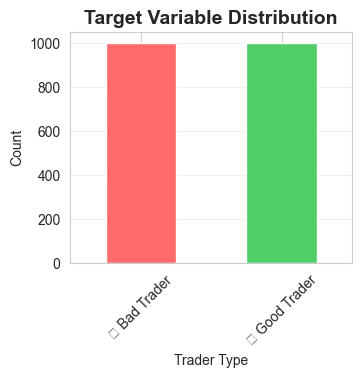

In [13]:
# Visualization
plt.figure(figsize=(8, 3))

#  Count plot
plt.subplot(1, 2, 1)
df['target_variable'].value_counts().plot(kind='bar', color=['#ff6b6b', '#51cf66'])
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Trader Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

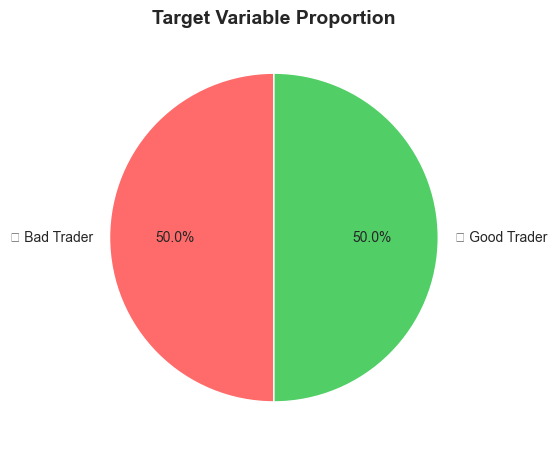

In [14]:
plt.subplot(1, 2, 2)
df['target_variable'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                           colors=['#ff6b6b', '#51cf66'],
                                           startangle=90)
plt.title('Target Variable Proportion', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [15]:
balance_ratio = df['target_variable'].value_counts().values[0] / df['target_variable'].value_counts().values[1]
if 0.8 <= balance_ratio <= 1.2:
    print("Classes are BALANCED - No need for resampling")
else:
    print("Classes are IMBALANCED - May need to handle")

Classes are BALANCED - No need for resampling


In [16]:
# Numerical Features Distribution
# Select numerical columns
numerical_cols = ['active_weeks', 'total_volume', 'tx_count_365d']

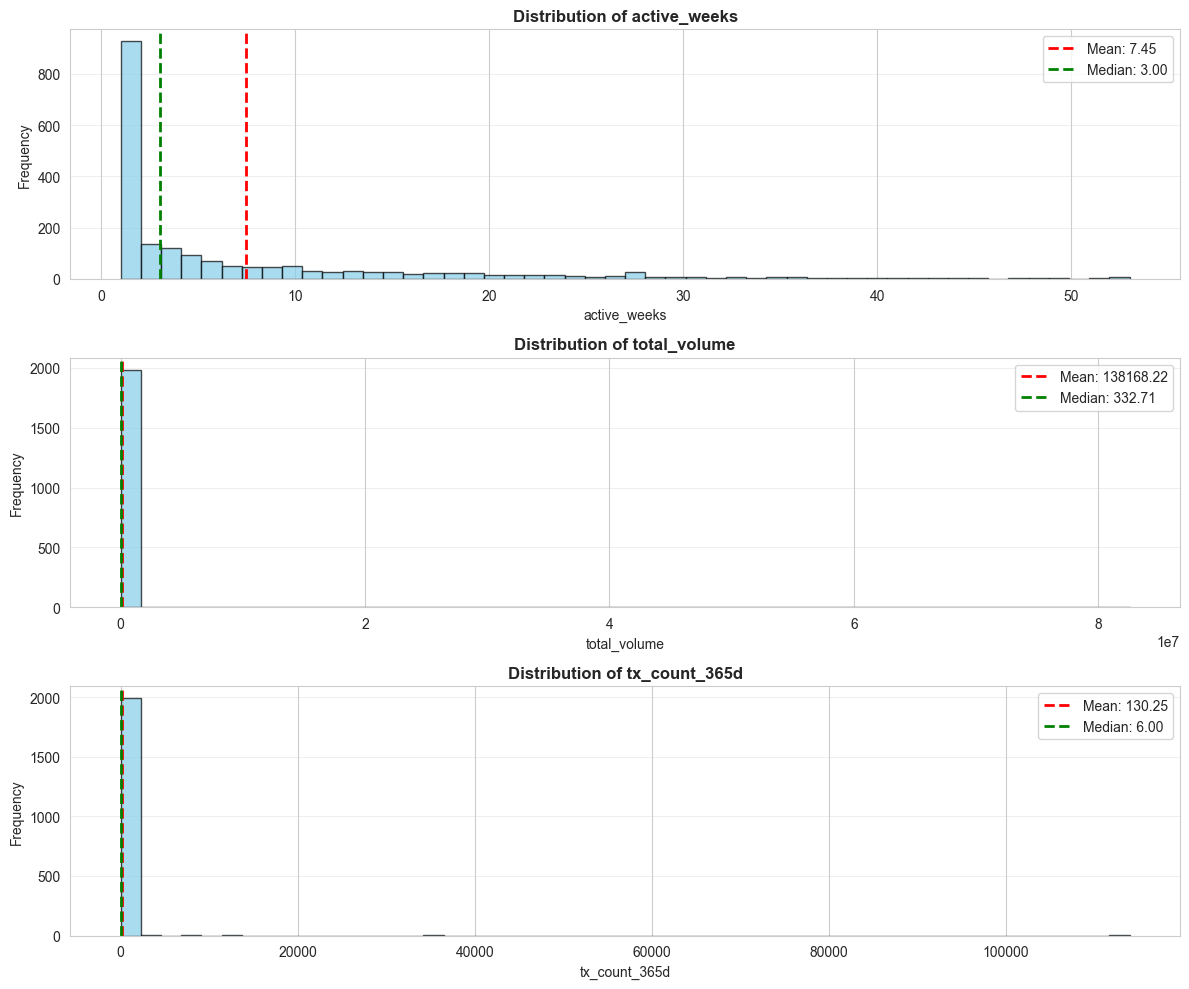

In [17]:
# Create subplots for histograms
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for idx, col in enumerate(numerical_cols):
    # Histogram
    axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [18]:
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"{col:25} | Skewness: {skewness:8.2f} | {'Highly Right-Skewed' if skewness > 1 else 'Approximately Normal' if abs(skewness) < 0.5 else 'Moderately Skewed'}")

print("\n Interpretation:")
print("   - Skewness > 1: Highly right-skewed (outliers on right)")
print("   - Skewness < -1: Highly left-skewed (outliers on left)")
print("   - |Skewness| < 0.5: Approximately normal distribution")

active_weeks              | Skewness:     2.14 | Highly Right-Skewed
total_volume              | Skewness:    28.06 | Highly Right-Skewed
tx_count_365d             | Skewness:    38.71 | Highly Right-Skewed

 Interpretation:
   - Skewness > 1: Highly right-skewed (outliers on right)
   - Skewness < -1: Highly left-skewed (outliers on left)
   - |Skewness| < 0.5: Approximately normal distribution


In [19]:
# Outlier Detection

numerical_cols = ['active_weeks', 'total_volume', 'tx_count_365d']

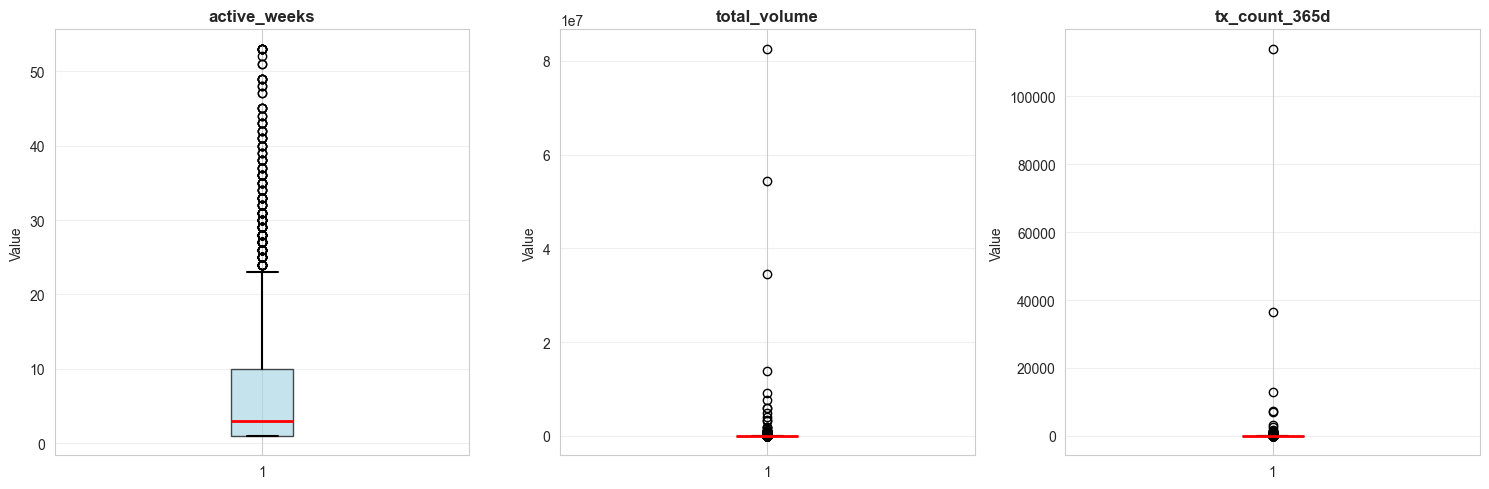

In [20]:
# Create box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='black', linewidth=1.5),
                     capprops=dict(color='black', linewidth=1.5))
    
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# Count outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    print(f"\n{col}:")
    print(f"   Lower Bound: {lower_bound:.2f}")
    print(f"   Upper Bound: {upper_bound:.2f}")
    print(f"   Outliers: {outlier_count} ({outlier_pct:.1f}%)")
    print(f"   Min Outlier: {df[df[col] > upper_bound][col].min():.2f}" if outlier_count > 0 else "   No outliers above")
    print(f"   Max Outlier: {df[col].max():.2f}")


active_weeks:
   Lower Bound: -12.50
   Upper Bound: 23.50
   Outliers: 165 (8.2%)
   Min Outlier: 24.00
   Max Outlier: 53.00

total_volume:
   Lower Bound: -7470.05
   Upper Bound: 12540.33
   Outliers: 347 (17.3%)
   Min Outlier: 12593.36
   Max Outlier: 82560170.62

tx_count_365d:
   Lower Bound: -34.00
   Upper Bound: 62.00
   Outliers: 253 (12.7%)
   Min Outlier: 63.00
   Max Outlier: 113968.00


In [22]:
# Categorical Features Analysis
categorical_cols = ['trader_activity_status', 'trader_volume_status', 'trader_weekly_frequency_status']


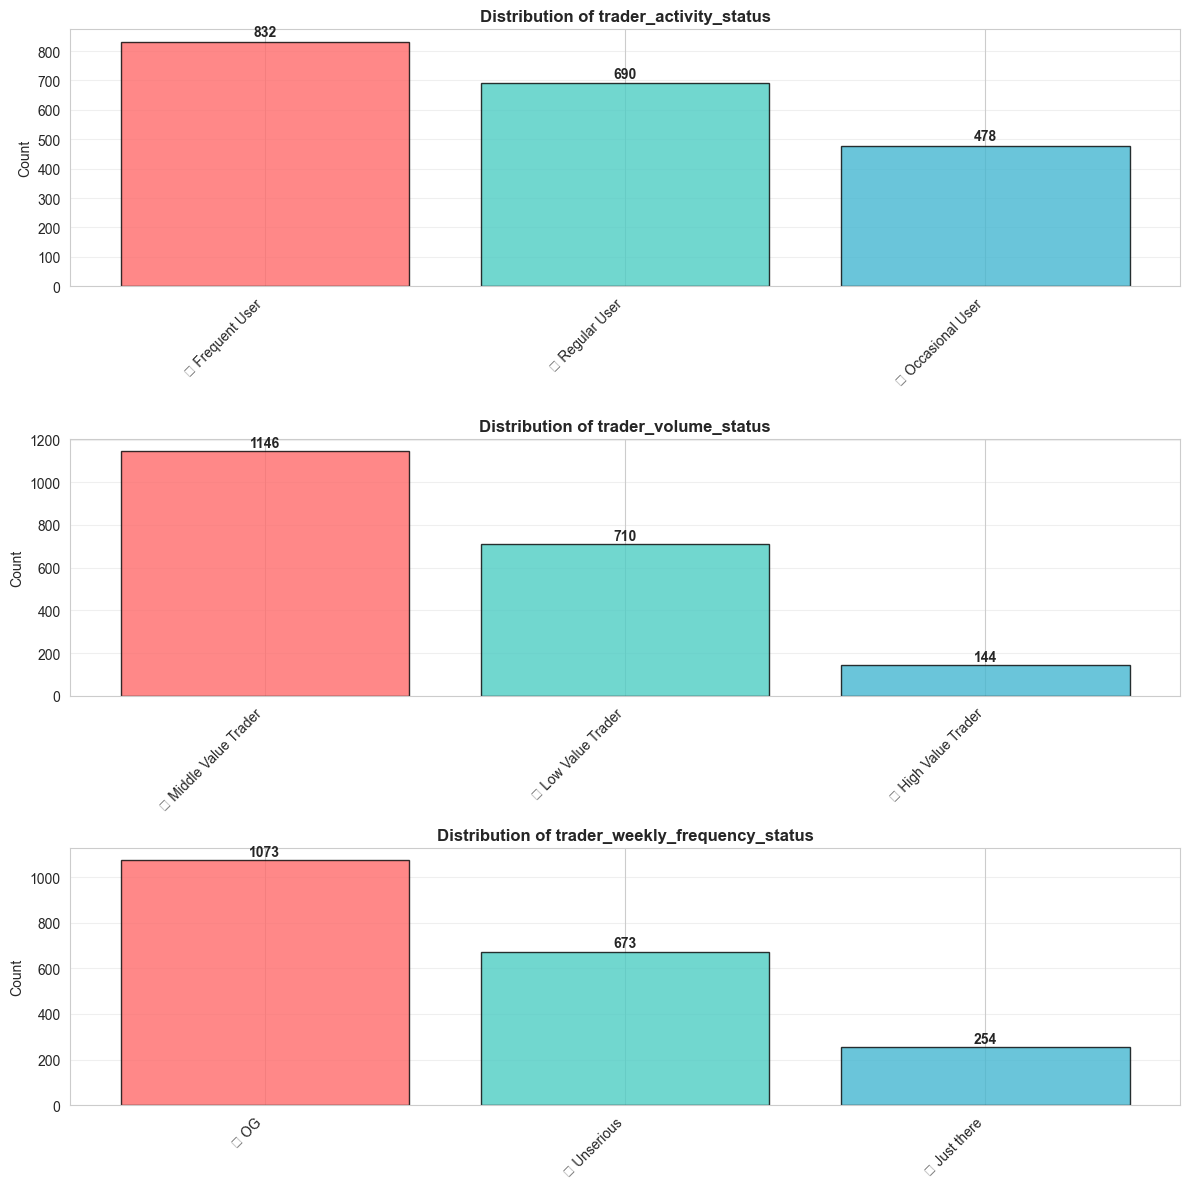

In [23]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for idx, col in enumerate(categorical_cols):
    # Count plot
    value_counts = df[col].value_counts()
    
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [24]:
for col in categorical_cols:
    print(f"\n{col}:")
    print("-" * 60)
    value_counts = df[col].value_counts()
    value_pcts = df[col].value_counts(normalize=True) * 100
    
    for category, count in value_counts.items():
        pct = value_pcts[category]
        print(f"   {category:30} | Count: {count:4} | Percentage: {pct:5.1f}%")

# Check relationship with target

for col in categorical_cols:
    print(f"\n{col}:")
    print("-" * 60)
    crosstab = pd.crosstab(df[col], df['target_variable'], normalize='index') * 100
    print(crosstab.round(1))




trader_activity_status:
------------------------------------------------------------
   🐦 Frequent User                | Count:  832 | Percentage:  41.6%
   🐤 Regular User                 | Count:  690 | Percentage:  34.5%
   🐣 Occasional User              | Count:  478 | Percentage:  23.9%

trader_volume_status:
------------------------------------------------------------
   🐟 Middle Value Trader          | Count: 1146 | Percentage:  57.3%
   🦐 Low Value Trader             | Count:  710 | Percentage:  35.5%
   🐳 High Value Trader            | Count:  144 | Percentage:   7.2%

trader_weekly_frequency_status:
------------------------------------------------------------
   🐦 OG                           | Count: 1073 | Percentage:  53.6%
   🐣 Unserious                    | Count:  673 | Percentage:  33.7%
   🐤 Just there                   | Count:  254 | Percentage:  12.7%

trader_activity_status:
------------------------------------------------------------
target_variable         🔴 Bad

In [25]:
# Correlation Analysis
# Select only numerical features for correlation
numerical_features = ['active_weeks', 'total_volume', 'tx_count_365d']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()



 Correlation Matrix:
               active_weeks  total_volume  tx_count_365d
active_weeks          1.000         0.208          0.179
total_volume          0.208         1.000          0.591
tx_count_365d         0.179         0.591          1.000


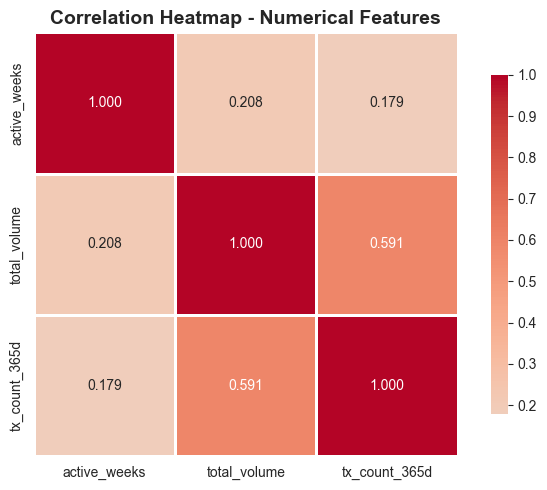

In [26]:
# Display correlation values
print("\n Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize with heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


No High Correllation observed

In [27]:
high_corr_found = False
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_found = True
            print(f"{correlation_matrix.columns[i]:20} <-> {correlation_matrix.columns[j]:20} | r = {corr_value:.3f}")

if not high_corr_found:
    print("No high correlations found - features are relatively independent!")

print("\n Interpretation:")
print("   - |r| > 0.9: Very strong correlation (potential multicollinearity)")
print("   - |r| > 0.7: Strong correlation (consider removing one)")
print("   - |r| < 0.7: Acceptable correlation")

No high correlations found - features are relatively independent!

 Interpretation:
   - |r| > 0.9: Very strong correlation (potential multicollinearity)
   - |r| > 0.7: Strong correlation (consider removing one)
   - |r| < 0.7: Acceptable correlation


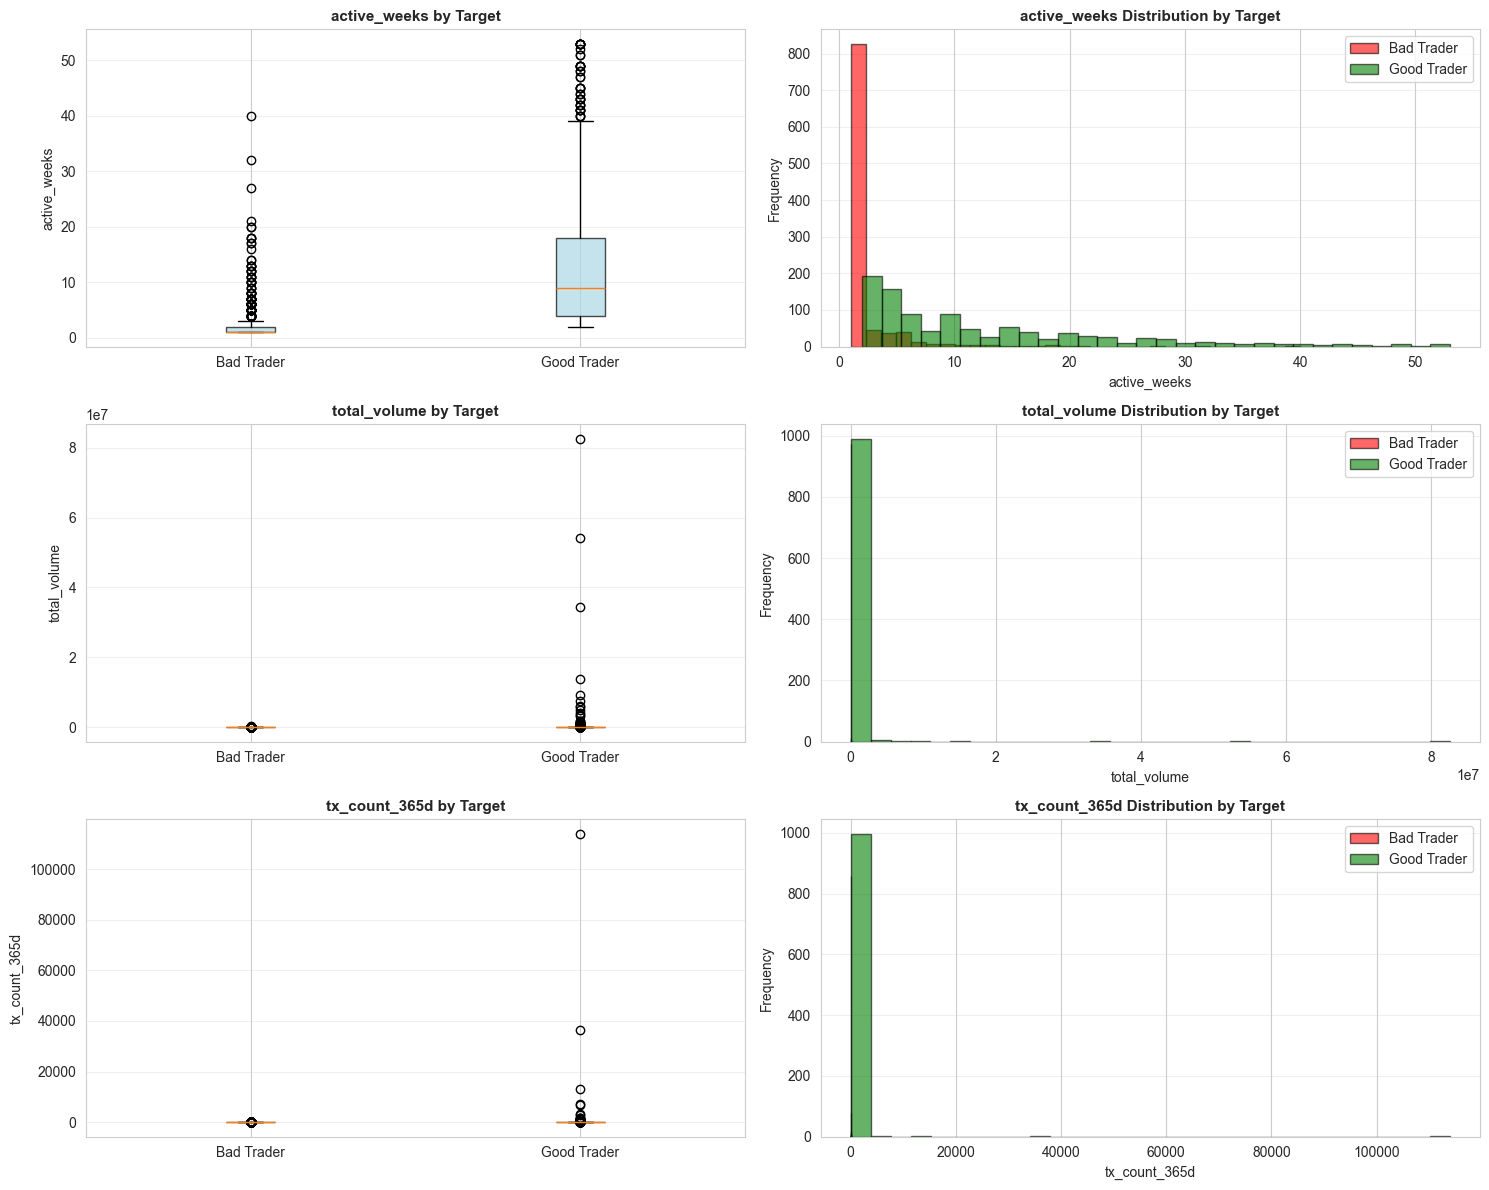

In [28]:
# Cell 9: Bivariate Analysis - Numerical Features vs Target
numerical_cols = ['active_weeks', 'total_volume', 'tx_count_365d']

# Create comparison plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for idx, col in enumerate(numerical_cols):
    
    # Box plot comparison
    axes[idx, 0].boxplot([df[df['target_variable'] == '🔴 Bad Trader'][col],
                          df[df['target_variable'] == '🟢 Good Trader'][col]],
                         labels=['Bad Trader', 'Good Trader'],
                         patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[idx, 0].set_title(f'{col} by Target', fontsize=11, fontweight='bold')
    axes[idx, 0].set_ylabel(col)
    axes[idx, 0].grid(axis='y', alpha=0.3)

    # Histogram comparison
    axes[idx, 1].hist(df[df['target_variable'] == '🔴 Bad Trader'][col], 
                     bins=30, alpha=0.6, label='Bad Trader', color='red', edgecolor='black')
    axes[idx, 1].hist(df[df['target_variable'] == '🟢 Good Trader'][col], 
                     bins=30, alpha=0.6, label='Good Trader', color='green', edgecolor='black')
    axes[idx, 1].set_title(f'{col} Distribution by Target', fontsize=11, fontweight='bold')
    axes[idx, 1].set_xlabel(col)
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].legend()
    axes[idx, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# Statistical comparison
for col in numerical_cols:
    bad_traders = df[df['target_variable'] == '🔴 Bad Trader'][col]
    good_traders = df[df['target_variable'] == '🟢 Good Trader'][col]
    
    print(f"\n{col}:")
    print("-" * 60)
    print(f"{'':20} | Bad Traders | Good Traders | Difference")
    print("-" * 60)
    print(f"{'Mean':20} | {bad_traders.mean():11.2f} | {good_traders.mean():12.2f} | {good_traders.mean() - bad_traders.mean():+10.2f}")
    print(f"{'Median':20} | {bad_traders.median():11.2f} | {good_traders.median():12.2f} | {good_traders.median() - bad_traders.median():+10.2f}")
    print(f"{'Std Dev':20} | {bad_traders.std():11.2f} | {good_traders.std():12.2f} | {good_traders.std() - bad_traders.std():+10.2f}")
    print(f"{'Min':20} | {bad_traders.min():11.2f} | {good_traders.min():12.2f} |")
    print(f"{'Max':20} | {bad_traders.max():11.2f} | {good_traders.max():12.2f} |")



active_weeks:
------------------------------------------------------------
                     | Bad Traders | Good Traders | Difference
------------------------------------------------------------
Mean                 |        2.13 |        12.78 |     +10.65
Median               |        1.00 |         9.00 |      +8.00
Std Dev              |        3.04 |        11.27 |      +8.23
Min                  |        1.00 |         2.00 |
Max                  |       40.00 |        53.00 |

total_volume:
------------------------------------------------------------
                     | Bad Traders | Good Traders | Difference
------------------------------------------------------------
Mean                 |     1412.49 |    274923.94 | +273511.45
Median               |       33.82 |      3763.03 |   +3729.20
Std Dev              |    11681.65 |   3373056.98 | +3361375.32
Min                  |        0.00 |        72.05 |
Max                  |   325393.44 |  82560170.62 |

tx_count_365

In [30]:
# T-test for statistical significance
from scipy import stats

for col in numerical_cols:
    bad_traders = df[df['target_variable'] == '🔴 Bad Trader'][col]
    good_traders = df[df['target_variable'] == '🟢 Good Trader'][col]
    
    t_stat, p_value = stats.ttest_ind(bad_traders, good_traders)
    
    print(f"\n{col}:")
    print(f"   T-statistic: {t_stat:.4f}")
    print(f"   P-value: {p_value:.6f}")
    
    if p_value < 0.001:
        print(f"   Result: HIGHLY SIGNIFICANT (p < 0.001) - Strong predictor!")
    elif p_value < 0.05:
        print(f"   Result: SIGNIFICANT (p < 0.05) - Good predictor!")
    else:
        print(f"   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor")

print("\n Interpretation:")
print("   - p < 0.001: Feature differs significantly between Good/Bad traders")
print("   - Lower p-value = stronger evidence of difference")



active_weeks:
   T-statistic: -28.8649
   P-value: 0.000000
   Result: HIGHLY SIGNIFICANT (p < 0.001) - Strong predictor!

total_volume:
   T-statistic: -2.5642
   P-value: 0.010414
   Result: SIGNIFICANT (p < 0.05) - Good predictor!

tx_count_365d:
   T-statistic: -2.0802
   P-value: 0.037632
   Result: SIGNIFICANT (p < 0.05) - Good predictor!

 Interpretation:
   - p < 0.001: Feature differs significantly between Good/Bad traders
   - Lower p-value = stronger evidence of difference


In [31]:
# Cell 10: Label Encode Categorical Features

from sklearn.preprocessing import LabelEncoder

print("="*60)
print("🏷️ LABEL ENCODING CATEGORICAL FEATURES")
print("="*60)

# Create a copy of the dataframe
df_encoded = df.copy()

# Define categorical columns to encode
categorical_cols = ['trader_activity_status', 'trader_volume_status', 'trader_weekly_frequency_status']

# Create label encoders
label_encoders = {}

# ============================================
# 1. ENCODE trader_activity_status
# ============================================
print(f"\n📊 Encoding: trader_activity_status")
print("-" * 60)

le_activity = LabelEncoder()
df_encoded['trader_activity_status_encoded'] = le_activity.fit_transform(df_encoded['trader_activity_status'])
label_encoders['trader_activity_status'] = le_activity

mapping = dict(zip(le_activity.classes_, le_activity.transform(le_activity.classes_)))
print("Mapping:")
for category, code in mapping.items():
    count = (df_encoded['trader_activity_status'] == category).sum()
    print(f"   {category:30} → {code} (n={count})")

# ============================================
# 2. ENCODE trader_volume_status (MANUAL FIX)
# ============================================
print(f"\n📊 Encoding: trader_volume_status (Manual Mapping)")
print("-" * 60)

# Manual mapping to ensure correct ordinal relationship
volume_mapping = {
    '🦐 Low Value Trader': 0,      # Lowest
    '🐟 Middle Value Trader': 1,   # Middle
    '🐳 High Value Trader': 2      # Highest
}

df_encoded['trader_volume_status_encoded'] = df_encoded['trader_volume_status'].map(volume_mapping)

print("Mapping (Corrected for Ordinal Relationship):")
for category, code in sorted(volume_mapping.items(), key=lambda x: x[1]):
    count = (df_encoded['trader_volume_status'] == category).sum()
    print(f"   {category:30} → {code} (n={count})")

# ============================================
# 3. ENCODE trader_weekly_frequency_status
# ============================================
print(f"\n📊 Encoding: trader_weekly_frequency_status")
print("-" * 60)

le_frequency = LabelEncoder()
df_encoded['trader_weekly_frequency_status_encoded'] = le_frequency.fit_transform(df_encoded['trader_weekly_frequency_status'])
label_encoders['trader_weekly_frequency_status'] = le_frequency

mapping = dict(zip(le_frequency.classes_, le_frequency.transform(le_frequency.classes_)))
print("Mapping:")
for category, code in mapping.items():
    count = (df_encoded['trader_weekly_frequency_status'] == category).sum()
    print(f"   {category:30} → {code} (n={count})")

# ============================================
# 4. ENCODE target_variable
# ============================================
print(f"\n📊 Encoding: target_variable")
print("-" * 60)

le_target = LabelEncoder()
df_encoded['target_encoded'] = le_target.fit_transform(df_encoded['target_variable'])
label_encoders['target'] = le_target

mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print("Mapping:")
for category, code in mapping.items():
    count = (df_encoded['target_variable'] == category).sum()
    print(f"   {category:30} → {code} (n={count})")

# ============================================
# SUMMARY
# ============================================
print("\n" + "="*60)
print("✅ ENCODING COMPLETE!")
print("="*60)
print(f"New columns created:")
print(f"   - trader_activity_status_encoded")
print(f"   - trader_volume_status_encoded (manually corrected)")
print(f"   - trader_weekly_frequency_status_encoded")
print(f"   - target_encoded")

# ============================================
# VERIFICATION
# ============================================
print("\n" + "="*60)
print("🔍 VERIFICATION - First 5 rows:")
print("="*60)
verification_cols = [
    'trader_activity_status', 'trader_activity_status_encoded',
    'trader_volume_status', 'trader_volume_status_encoded',
    'trader_weekly_frequency_status', 'trader_weekly_frequency_status_encoded',
    'target_variable', 'target_encoded'
]
print(df_encoded[verification_cols].head())

# Check encoding is correct
print("\n" + "="*60)
print("✅ ENCODING VALIDATION:")
print("="*60)
print("\n1. trader_activity_status: 0 (Occasional) < 1 (Regular) < 2 (Frequent)")
print("   ✅ Ordinal relationship preserved")

print("\n2. trader_volume_status: 0 (Low) < 1 (Middle) < 2 (High)")
print("   ✅ Ordinal relationship CORRECTED")

print("\n3. trader_weekly_frequency_status: 0 (Unserious) < 1 (Just there) < 2 (OG)")
print("   ✅ Ordinal relationship preserved")

print("\n4. target_variable: 0 (Bad Trader) < 1 (Good Trader)")
print("   ✅ Binary encoding standard")

🏷️ LABEL ENCODING CATEGORICAL FEATURES

📊 Encoding: trader_activity_status
------------------------------------------------------------
Mapping:
   🐣 Occasional User              → 0 (n=478)
   🐤 Regular User                 → 1 (n=690)
   🐦 Frequent User                → 2 (n=832)

📊 Encoding: trader_volume_status (Manual Mapping)
------------------------------------------------------------
Mapping (Corrected for Ordinal Relationship):
   🦐 Low Value Trader             → 0 (n=710)
   🐟 Middle Value Trader          → 1 (n=1146)
   🐳 High Value Trader            → 2 (n=144)

📊 Encoding: trader_weekly_frequency_status
------------------------------------------------------------
Mapping:
   🐣 Unserious                    → 0 (n=673)
   🐤 Just there                   → 1 (n=254)
   🐦 OG                           → 2 (n=1073)

📊 Encoding: target_variable
------------------------------------------------------------
Mapping:
   🔴 Bad Trader                   → 0 (n=1000)
   🟢 Good Trader     

In [32]:
# Cell 11: Feature Engineering - Create Tier 1 + Tier 2 Features

import numpy as np

print("="*60)
print("🔧 FEATURE ENGINEERING - TIER 1 + TIER 2")
print("="*60)

# ============================================
# TIER 1: MUST-HAVE FEATURES
# ============================================
print("\n⭐ TIER 1 FEATURES:")
print("-" * 60)

# 1. Log transformations (handle outliers and skewness)
df_encoded['log_total_volume'] = np.log1p(df_encoded['total_volume'])
df_encoded['log_tx_count'] = np.log1p(df_encoded['tx_count_365d'])
print("✅ Created: log_total_volume")
print("✅ Created: log_tx_count")

# 2. Average volume per week
df_encoded['avg_volume_per_week'] = df_encoded['total_volume'] / df_encoded['active_weeks']
print("✅ Created: avg_volume_per_week")

# 3. Transactions per active week
df_encoded['tx_per_active_week'] = df_encoded['tx_count_365d'] / df_encoded['active_weeks']
print("✅ Created: tx_per_active_week")

# ============================================
# TIER 2: RECOMMENDED FEATURES
# ============================================
print("\n⭐ TIER 2 FEATURES:")
print("-" * 60)

# 4. Average volume per transaction
df_encoded['avg_volume_per_tx'] = df_encoded['total_volume'] / df_encoded['tx_count_365d']
print("✅ Created: avg_volume_per_tx")

# 5. Activity ratio (proportion of year active)
df_encoded['activity_ratio'] = df_encoded['active_weeks'] / 52
print("✅ Created: activity_ratio")

# 6. Volume-transaction interaction (using log versions)
df_encoded['volume_tx_interaction'] = df_encoded['log_total_volume'] * df_encoded['log_tx_count']
print("✅ Created: volume_tx_interaction")

# ============================================
# HANDLE EDGE CASES
# ============================================
print("\n" + "="*60)
print("🔍 CHECKING FOR ISSUES:")
print("="*60)

# Check for infinite values
new_features = [
    'log_total_volume', 'log_tx_count', 'avg_volume_per_week',
    'tx_per_active_week', 'avg_volume_per_tx', 'activity_ratio',
    'volume_tx_interaction'
]

inf_check = df_encoded[new_features].isin([np.inf, -np.inf]).sum()
print("\n📊 Infinite values:")
print(inf_check)

if inf_check.sum() > 0:
    print("\n⚠️ Replacing infinite values with NaN...")
    df_encoded[new_features] = df_encoded[new_features].replace([np.inf, -np.inf], np.nan)

# Check for NaN values
nan_check = df_encoded[new_features].isnull().sum()
print("\n📊 NaN values:")
print(nan_check)

if nan_check.sum() > 0:
    print("\n⚠️ NaN values found - will handle during preprocessing")
else:
    print("\n✅ No NaN values found!")

# ============================================
# SUMMARY STATISTICS
# ============================================
print("\n" + "="*60)
print("📈 NEW FEATURES SUMMARY STATISTICS:")
print("="*60)
print(df_encoded[new_features].describe())

# ============================================
# VERIFICATION
# ============================================
print("\n" + "="*60)
print("🔍 VERIFICATION - Sample Rows:")
print("="*60)
sample_cols = ['active_weeks', 'total_volume', 'tx_count_365d'] + new_features
print(df_encoded[sample_cols].head(10))

print("\n" + "="*60)
print("✅ FEATURE ENGINEERING COMPLETE!")
print("="*60)
print(f"📊 Total Features Created: {len(new_features)}")
print(f"📊 Tier 1 Features: 4")
print(f"📊 Tier 2 Features: 3")
print(f"\n💾 Current DataFrame Shape: {df_encoded.shape}")

🔧 FEATURE ENGINEERING - TIER 1 + TIER 2

⭐ TIER 1 FEATURES:
------------------------------------------------------------
✅ Created: log_total_volume
✅ Created: log_tx_count
✅ Created: avg_volume_per_week
✅ Created: tx_per_active_week

⭐ TIER 2 FEATURES:
------------------------------------------------------------
✅ Created: avg_volume_per_tx
✅ Created: activity_ratio
✅ Created: volume_tx_interaction

🔍 CHECKING FOR ISSUES:

📊 Infinite values:
log_total_volume         0
log_tx_count             0
avg_volume_per_week      0
tx_per_active_week       0
avg_volume_per_tx        0
activity_ratio           0
volume_tx_interaction    0
dtype: int64

📊 NaN values:
log_total_volume         0
log_tx_count             0
avg_volume_per_week      0
tx_per_active_week       0
avg_volume_per_tx        0
activity_ratio           0
volume_tx_interaction    0
dtype: int64

✅ No NaN values found!

📈 NEW FEATURES SUMMARY STATISTICS:
       log_total_volume  log_tx_count  avg_volume_per_week  \
count      2

🔥 CORRELATION ANALYSIS - ALL FEATURES


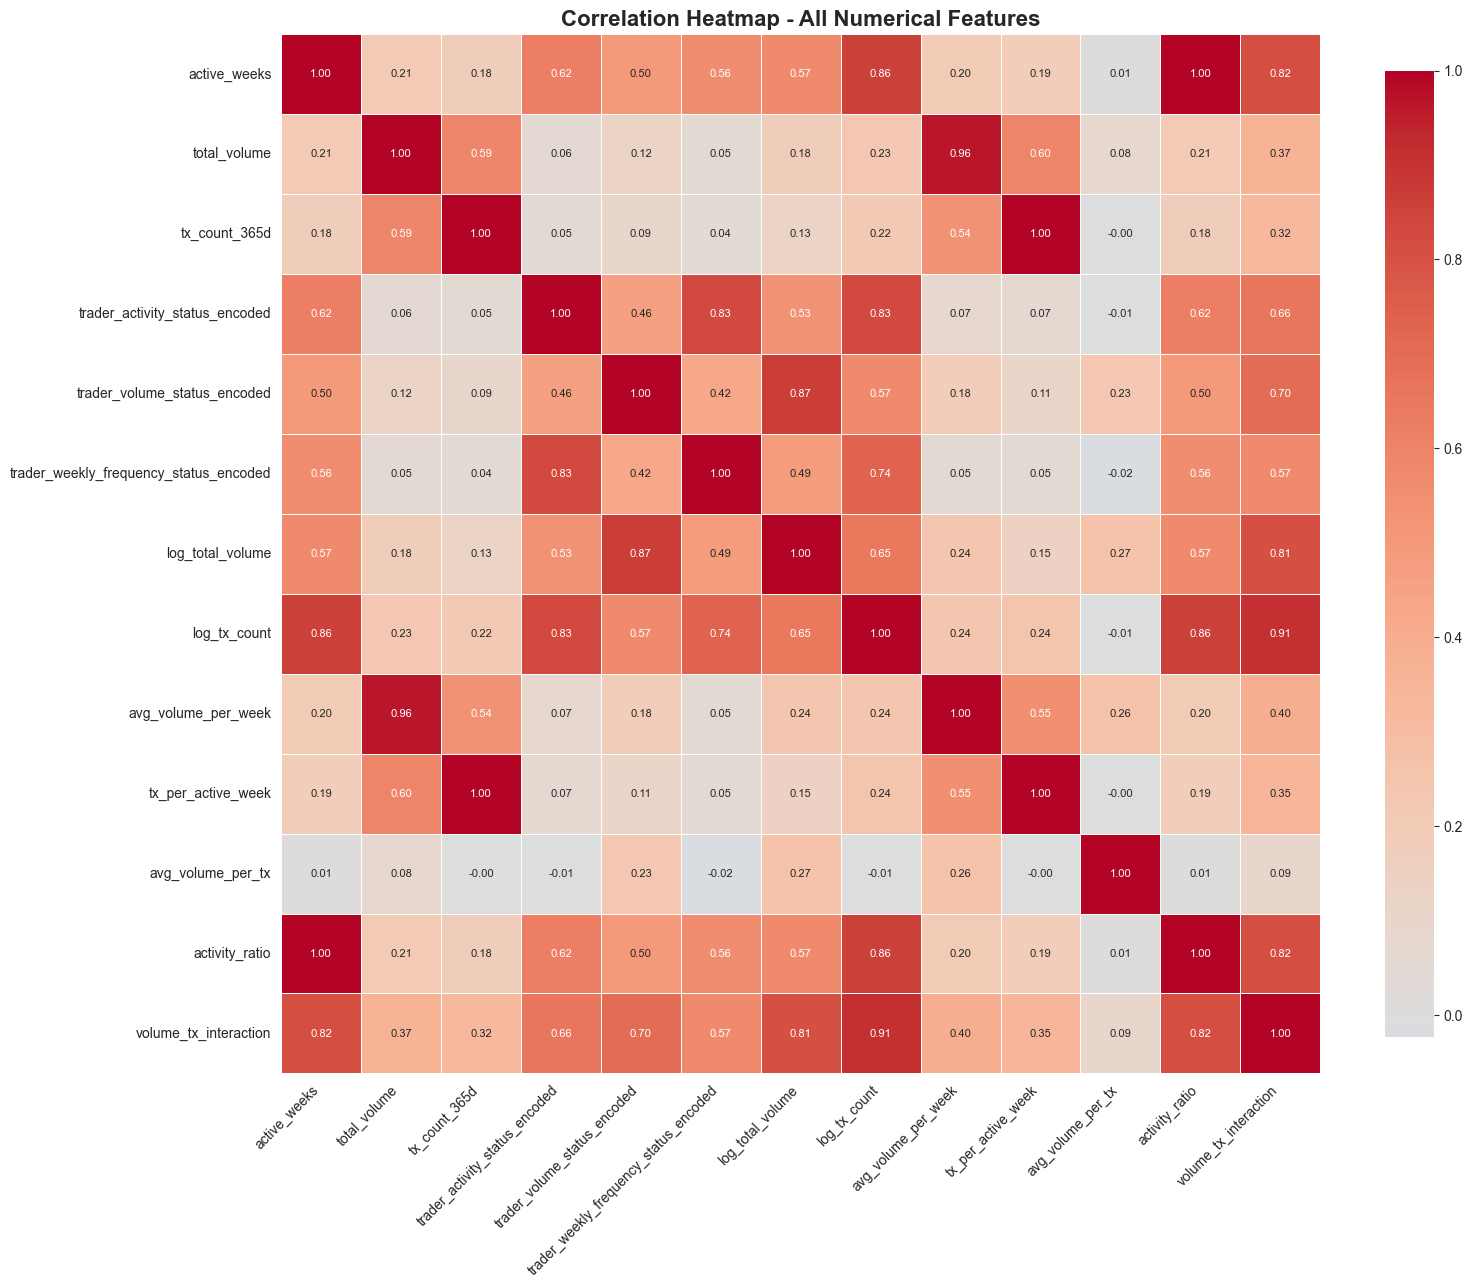


🔍 HIGH CORRELATION PAIRS (|r| > 0.9):

⚠️ WARNING: High correlations found!

active_weeks                   <-> activity_ratio                
   Correlation: 1.000
   ⚠️ Consider removing one of these features

total_volume                   <-> avg_volume_per_week           
   Correlation: 0.961
   ⚠️ Consider removing one of these features

tx_count_365d                  <-> tx_per_active_week            
   Correlation: 0.997
   ⚠️ Consider removing one of these features

log_tx_count                   <-> volume_tx_interaction         
   Correlation: 0.909
   ⚠️ Consider removing one of these features

📊 MODERATE CORRELATION PAIRS (0.7 < |r| < 0.9):

⚠️ Moderate correlations found (acceptable but worth noting):

active_weeks                   <-> log_tx_count                  
   Correlation: 0.858

active_weeks                   <-> volume_tx_interaction         
   Correlation: 0.819

trader_activity_status_encoded <-> trader_weekly_frequency_status_encoded
   Correlation: 0.

In [34]:
# Cell 12: Correlation Analysis - All Features

print("="*60)
print("🔥 CORRELATION ANALYSIS - ALL FEATURES")
print("="*60)

# Select all numerical features (original + new)
all_numerical_features = [
    # Original numerical
    'active_weeks', 'total_volume', 'tx_count_365d',
    # Encoded categorical
    'trader_activity_status_encoded', 'trader_volume_status_encoded', 
    'trader_weekly_frequency_status_encoded',
    # New engineered features
    'log_total_volume', 'log_tx_count', 'avg_volume_per_week',
    'tx_per_active_week', 'avg_volume_per_tx', 'activity_ratio',
    'volume_tx_interaction'
]

# Calculate correlation matrix
correlation_matrix = df_encoded[all_numerical_features].corr()

# Visualize with heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 8})
plt.title('Correlation Heatmap - All Numerical Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find high correlations (|r| > 0.9)
print("\n" + "="*60)
print("🔍 HIGH CORRELATION PAIRS (|r| > 0.9):")
print("="*60)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.9:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if high_corr_pairs:
    print("\n⚠️ WARNING: High correlations found!")
    for pair in high_corr_pairs:
        print(f"\n{pair['Feature 1']:30} <-> {pair['Feature 2']:30}")
        print(f"   Correlation: {pair['Correlation']:.3f}")
        print(f"   ⚠️ Consider removing one of these features")
else:
    print("\n✅ No high correlations (|r| > 0.9) found!")
    print("   All features are sufficiently independent.")

# Find moderate correlations (0.7 < |r| < 0.9)
print("\n" + "="*60)
print("📊 MODERATE CORRELATION PAIRS (0.7 < |r| < 0.9):")
print("="*60)

moderate_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.7 < abs(corr_value) <= 0.9:
            moderate_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if moderate_corr_pairs:
    print("\n⚠️ Moderate correlations found (acceptable but worth noting):")
    for pair in moderate_corr_pairs:
        print(f"\n{pair['Feature 1']:30} <-> {pair['Feature 2']:30}")
        print(f"   Correlation: {pair['Correlation']:.3f}")
else:
    print("\n✅ No moderate correlations (0.7 < |r| < 0.9) found!")

# Correlation with target
print("\n" + "="*60)
print("🎯 CORRELATION WITH TARGET VARIABLE:")
print("="*60)

target_correlations = df_encoded[all_numerical_features + ['target_encoded']].corr()['target_encoded'].drop('target_encoded').sort_values(ascending=False)

print("\nTop 10 Features Most Correlated with Target:")
print("-" * 60)
for feature, corr in target_correlations.head(10).items():
    print(f"{feature:40} | r = {corr:6.3f}")

print("\n💡 Interpretation:")
print("   - |r| > 0.5: Strong linear relationship with target")
print("   - 0.3 < |r| < 0.5: Moderate relationship")
print("   - |r| < 0.3: Weak linear relationship (but may still be useful)")

🗑️ REMOVING REDUNDANT FEATURES

❌ Removing these features:
   - activity_ratio
   - avg_volume_per_week
   - tx_per_active_week
   - total_volume
   - tx_count_365d

📊 Shape before removal: (2000, 19)
📊 Shape after (no change): (2000, 19)
   (Columns kept in dataframe for reference)

✅ FINAL FEATURE SET FOR MODELING:

📊 Total Features: 8

Features:
   1. active_weeks                                  | Target Correlation:  0.542
   2. log_total_volume                              | Target Correlation:  0.705
   3. log_tx_count                                  | Target Correlation:  0.682
   4. avg_volume_per_tx                             | Target Correlation:  0.027
   5. volume_tx_interaction                         | Target Correlation:  0.653
   6. trader_activity_status_encoded                | Target Correlation:  0.719
   7. trader_volume_status_encoded                  | Target Correlation:  0.720
   8. trader_weekly_frequency_status_encoded        | Target Correlation:  0.765



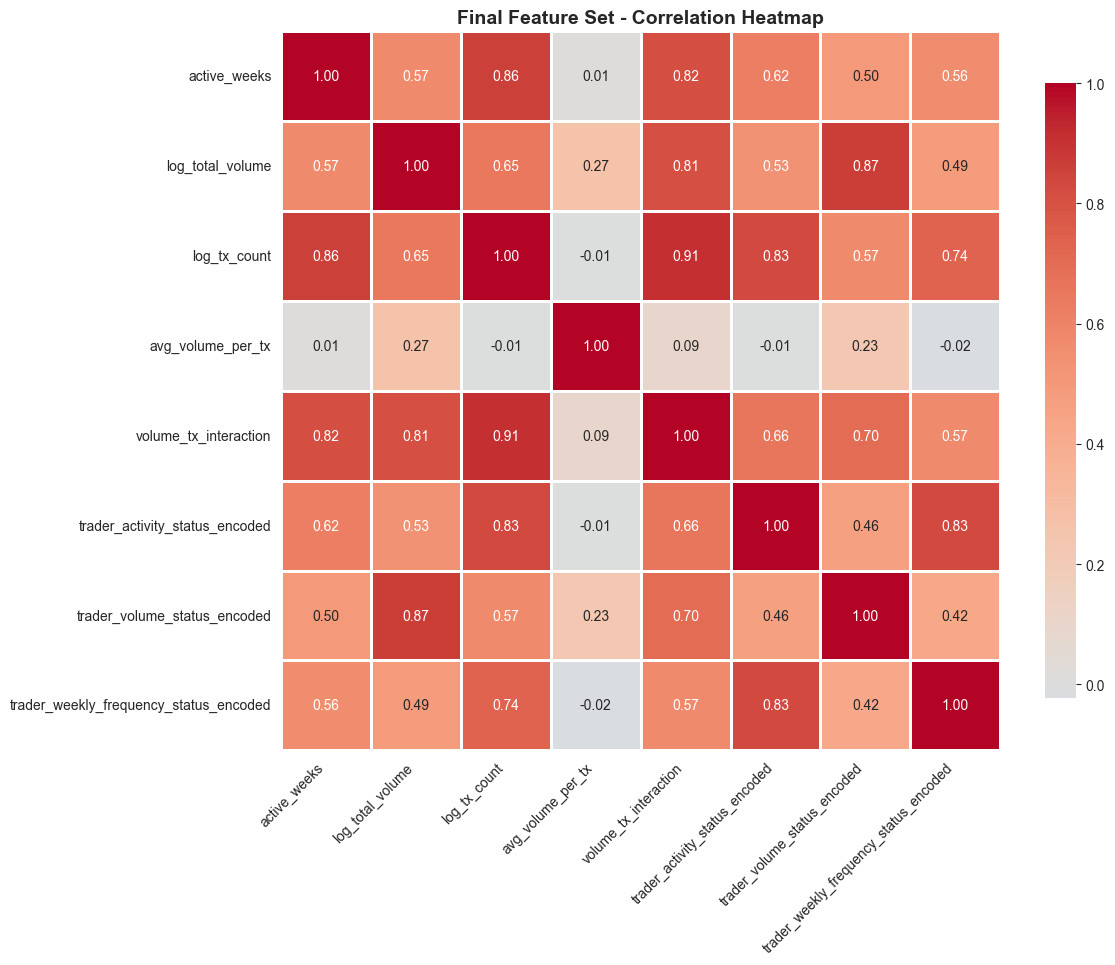


✅ FEATURE SELECTION COMPLETE!
📊 Original features: 13
📊 Removed (redundant): 5
📊 Final features: 8

💡 Reduced multicollinearity while keeping predictive power!


In [35]:
# Cell 13: Remove Redundant Features

print("="*60)
print("🗑️ REMOVING REDUNDANT FEATURES")
print("="*60)

# Features to remove (high multicollinearity)
features_to_remove = [
    'activity_ratio',           # Perfect correlation with active_weeks
    'avg_volume_per_week',      # r=0.961 with total_volume
    'tx_per_active_week',       # r=0.997 with tx_count_365d
    'total_volume',             # Keeping log version instead
    'tx_count_365d'             # Keeping log version instead
]

print("\n❌ Removing these features:")
for feature in features_to_remove:
    print(f"   - {feature}")

# Create final feature set
df_final = df_encoded.copy()

print(f"\n📊 Shape before removal: {df_final.shape}")

# Note: We'll keep these columns in the dataframe but won't use them for modeling
print(f"📊 Shape after (no change): {df_final.shape}")
print("   (Columns kept in dataframe for reference)")

# Define final feature list for modeling
final_features = [
    # Original numerical (best versions)
    'active_weeks',
    
    # Transformed numerical
    'log_total_volume',
    'log_tx_count',
    
    # Engineered features (non-redundant)
    'avg_volume_per_tx',
    'volume_tx_interaction',
    
    # Encoded categorical
    'trader_activity_status_encoded',
    'trader_volume_status_encoded',
    'trader_weekly_frequency_status_encoded'
]

print("\n" + "="*60)
print("✅ FINAL FEATURE SET FOR MODELING:")
print("="*60)
print(f"\n📊 Total Features: {len(final_features)}")
print("\nFeatures:")
for i, feature in enumerate(final_features, 1):
    target_corr = df_final[[feature, 'target_encoded']].corr().iloc[0, 1]
    print(f"   {i}. {feature:45} | Target Correlation: {target_corr:6.3f}")

# Verify no high correlations in final set
print("\n" + "="*60)
print("🔍 FINAL CORRELATION CHECK:")
print("="*60)

final_corr_matrix = df_final[final_features].corr()

high_corr_final = []
for i in range(len(final_corr_matrix.columns)):
    for j in range(i+1, len(final_corr_matrix.columns)):
        corr_value = final_corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.9:
            high_corr_final.append((final_corr_matrix.columns[i], 
                                   final_corr_matrix.columns[j], 
                                   corr_value))

if high_corr_final:
    print("\n⚠️ WARNING: Still have high correlations!")
    for feat1, feat2, corr in high_corr_final:
        print(f"   {feat1} <-> {feat2}: {corr:.3f}")
else:
    print("\n✅ No high correlations (|r| > 0.9) in final feature set!")
    print("   Ready for modeling!")

# Show correlation heatmap of final features
plt.figure(figsize=(12, 10))
sns.heatmap(final_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Final Feature Set - Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("✅ FEATURE SELECTION COMPLETE!")
print("="*60)
print(f"📊 Original features: 13")
print(f"📊 Removed (redundant): 5")
print(f"📊 Final features: 8")
print(f"\n💡 Reduced multicollinearity while keeping predictive power!")

In [36]:
# Cell 14: Prepare Data for Modeling

print("="*60)
print("📦 DATA PREPARATION FOR MODELING")
print("="*60)

# Define final features for modeling
final_features = [
    'active_weeks',
    'log_total_volume',
    'log_tx_count',
    'avg_volume_per_tx',
    'volume_tx_interaction',
    'trader_activity_status_encoded',
    'trader_volume_status_encoded',
    'trader_weekly_frequency_status_encoded'
]

# Separate features (X) and target (y)
X = df_final[final_features].copy()
y = df_final['target_encoded'].copy()

print("\n📊 Dataset Summary:")
print("-" * 60)
print(f"Total samples: {len(X)}")
print(f"Number of features: {len(final_features)}")
print(f"Target variable: target_encoded (0=Bad Trader, 1=Good Trader)")

# Check target distribution
print("\n🎯 Target Distribution:")
print("-" * 60)
print(y.value_counts().sort_index())
print(f"\nClass Balance: {y.value_counts()[0]} Bad : {y.value_counts()[1]} Good")
print(f"Percentage: {y.value_counts(normalize=True)[0]*100:.1f}% : {y.value_counts(normalize=True)[1]*100:.1f}%")

# Verify no missing values
print("\n" + "="*60)
print("🔍 DATA QUALITY CHECK:")
print("="*60)
print(f"\nMissing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")

if X.isnull().sum().sum() == 0 and y.isnull().sum() == 0:
    print("\n✅ No missing values - data is clean!")
else:
    print("\n⚠️ Missing values detected - will need to handle")

# Show feature summary
print("\n" + "="*60)
print("📊 FEATURE SUMMARY:")
print("="*60)
print(X.describe())

# Show first few rows
print("\n" + "="*60)
print("👀 SAMPLE DATA (First 5 rows):")
print("="*60)
print(X.head())
print("\nCorresponding targets:")
print(y.head().values)

print("\n" + "="*60)
print("✅ DATA PREPARATION COMPLETE!")
print("="*60)
print("📊 Ready for train-test split!")

📦 DATA PREPARATION FOR MODELING

📊 Dataset Summary:
------------------------------------------------------------
Total samples: 2000
Number of features: 8
Target variable: target_encoded (0=Bad Trader, 1=Good Trader)

🎯 Target Distribution:
------------------------------------------------------------
target_encoded
0    1000
1    1000
Name: count, dtype: int64

Class Balance: 1000 Bad : 1000 Good
Percentage: 50.0% : 50.0%

🔍 DATA QUALITY CHECK:

Missing values in X: 0
Missing values in y: 0

✅ No missing values - data is clean!

📊 FEATURE SUMMARY:
       active_weeks  log_total_volume  log_tx_count  avg_volume_per_tx  \
count   2000.000000      2.000000e+03   2000.000000       2.000000e+03   
mean       7.452000      5.950687e+00      2.297182       1.081261e+03   
std        9.820281      3.449751e+00      1.554124       6.334929e+03   
min        1.000000      3.873769e-07      0.693147       3.873770e-07   
25%        1.000000      3.550739e+00      1.098612       7.297368e+00   
50

In [37]:
# Cell 15: Train-Test Split

from sklearn.model_selection import train_test_split

print("="*60)
print("✂️ TRAIN-TEST SPLIT")
print("="*60)

# Split: 80% train+val, 20% test
# Using stratify to maintain class balance
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for test (400 samples)
    random_state=42,    # For reproducibility
    stratify=y          # Maintain 50-50 balance in both sets
)

print("\n📊 Split Summary:")
print("-" * 60)
print(f"Total samples: {len(X)}")
print(f"Training + Validation: {len(X_train_val)} ({len(X_train_val)/len(X)*100:.1f}%)")
print(f"Test (held-out): {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Verify stratification worked
print("\n🎯 Class Distribution Check:")
print("-" * 60)
print("\nTraining + Validation set:")
print(y_train_val.value_counts().sort_index())
print(f"Percentage: {y_train_val.value_counts(normalize=True)[0]*100:.1f}% Bad : {y_train_val.value_counts(normalize=True)[1]*100:.1f}% Good")

print("\nTest set:")
print(y_test.value_counts().sort_index())
print(f"Percentage: {y_test.value_counts(normalize=True)[0]*100:.1f}% Bad : {y_test.value_counts(normalize=True)[1]*100:.1f}% Good")

if abs(y_train_val.value_counts(normalize=True)[0] - 0.5) < 0.01 and \
   abs(y_test.value_counts(normalize=True)[0] - 0.5) < 0.01:
    print("\n✅ Stratification successful - both sets are balanced!")
else:
    print("\n⚠️ Warning: Stratification may have issues")

# Show shapes
print("\n" + "="*60)
print("📐 DATA SHAPES:")
print("="*60)
print(f"X_train_val: {X_train_val.shape}")
print(f"y_train_val: {y_train_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print("\n" + "="*60)
print("✅ TRAIN-TEST SPLIT COMPLETE!")
print("="*60)
print("🔒 Test set is now LOCKED - will only use at final evaluation")
print("📊 Will use 5-Fold CV on train_val set for model development")

✂️ TRAIN-TEST SPLIT

📊 Split Summary:
------------------------------------------------------------
Total samples: 2000
Training + Validation: 1600 (80.0%)
Test (held-out): 400 (20.0%)

🎯 Class Distribution Check:
------------------------------------------------------------

Training + Validation set:
target_encoded
0    800
1    800
Name: count, dtype: int64
Percentage: 50.0% Bad : 50.0% Good

Test set:
target_encoded
0    200
1    200
Name: count, dtype: int64
Percentage: 50.0% Bad : 50.0% Good

✅ Stratification successful - both sets are balanced!

📐 DATA SHAPES:
X_train_val: (1600, 8)
y_train_val: (1600,)
X_test: (400, 8)
y_test: (400,)

✅ TRAIN-TEST SPLIT COMPLETE!
🔒 Test set is now LOCKED - will only use at final evaluation
📊 Will use 5-Fold CV on train_val set for model development


In [38]:
# Cell 16: Feature Scaling

from sklearn.preprocessing import StandardScaler

print("="*60)
print("⚖️ FEATURE SCALING")
print("="*60)

# Identify which features to scale
# We'll scale ALL features (numerical + encoded categorical work with StandardScaler)
features_to_scale = final_features

print(f"\n📊 Features to scale: {len(features_to_scale)}")
print("Features:")
for feature in features_to_scale:
    print(f"   - {feature}")

# Initialize StandardScaler
scaler = StandardScaler()

print("\n" + "="*60)
print("🔧 FITTING SCALER:")
print("="*60)
print("Fitting on Training+Validation set only...")

# Fit scaler on training+validation data ONLY
scaler.fit(X_train_val)

print("✅ Scaler fitted!")

# Show scaling parameters learned
print("\n📊 Scaling Parameters (Mean and Std from Train+Val):")
print("-" * 60)
scaling_params = pd.DataFrame({
    'Feature': features_to_scale,
    'Mean': scaler.mean_,
    'Std': scaler.scale_
})
print(scaling_params.to_string(index=False))

# Transform both training and test sets
print("\n" + "="*60)
print("🔄 TRANSFORMING DATA:")
print("="*60)

X_train_val_scaled = scaler.transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Training+Validation set scaled: {X_train_val_scaled.shape}")
print(f"✅ Test set scaled: {X_test_scaled.shape}")

# Convert back to DataFrames for easier handling (optional)
X_train_val_scaled = pd.DataFrame(X_train_val_scaled, columns=features_to_scale, index=X_train_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_to_scale, index=X_test.index)

# Verify scaling worked
print("\n" + "="*60)
print("🔍 SCALING VERIFICATION:")
print("="*60)

print("\nTraining+Validation set after scaling:")
print(X_train_val_scaled.describe().loc[['mean', 'std']])

print("\n💡 Expected: Mean ≈ 0, Std ≈ 1 for all features")

# Check if scaling is correct
means = X_train_val_scaled.mean()
stds = X_train_val_scaled.std()

if all(abs(means) < 0.01) and all(abs(stds - 1) < 0.01):
    print("\n✅ Scaling verified - all features standardized correctly!")
else:
    print("\n⚠️ Note: Small deviations from mean=0, std=1 are normal due to rounding")

# Show sample of scaled data
print("\n" + "="*60)
print("👀 SAMPLE SCALED DATA (First 5 rows):")
print("="*60)
print(X_train_val_scaled.head())

# Compare before and after
print("\n" + "="*60)
print("📊 BEFORE vs AFTER SCALING (Sample):")
print("="*60)
comparison = pd.DataFrame({
    'Feature': features_to_scale,
    'Original_Mean': X_train_val.mean().values,
    'Scaled_Mean': X_train_val_scaled.mean().values,
    'Original_Std': X_train_val.std().values,
    'Scaled_Std': X_train_val_scaled.std().values
})
print(comparison.to_string(index=False))

print("\n" + "="*60)
print("✅ FEATURE SCALING COMPLETE!")
print("="*60)
print("🎯 Data is now ready for modeling!")
print("📊 All features on same scale (mean=0, std=1)")
print("🔒 Test set scaled using training statistics (no data leakage)")

⚖️ FEATURE SCALING

📊 Features to scale: 8
Features:
   - active_weeks
   - log_total_volume
   - log_tx_count
   - avg_volume_per_tx
   - volume_tx_interaction
   - trader_activity_status_encoded
   - trader_volume_status_encoded
   - trader_weekly_frequency_status_encoded

🔧 FITTING SCALER:
Fitting on Training+Validation set only...
✅ Scaler fitted!

📊 Scaling Parameters (Mean and Std from Train+Val):
------------------------------------------------------------
                               Feature       Mean         Std
                          active_weeks   7.621875    9.956915
                      log_total_volume   5.945913    3.456618
                          log_tx_count   2.319963    1.568695
                     avg_volume_per_tx 983.047044 6214.279687
                 volume_tx_interaction  17.389013   20.144517
        trader_activity_status_encoded   1.179375    0.786416
          trader_volume_status_encoded   0.718125    0.592597
trader_weekly_frequency_status_encod

🤖 LOGISTIC REGRESSION - BASELINE MODEL

📊 Model Configuration:
------------------------------------------------------------
Model: Logistic Regression
Solver: lbfgs
Max Iterations: 1000
Cross-Validation: 5-Fold Stratified
Training samples: 1600

🔄 RUNNING 5-FOLD CROSS-VALIDATION...

📊 Cross-Validation Results:
------------------------------------------------------------
Fold 1: 1.0000 (100.00%)
Fold 2: 1.0000 (100.00%)
Fold 3: 1.0000 (100.00%)
Fold 4: 0.9969 (99.69%)
Fold 5: 0.9969 (99.69%)

📈 CROSS-VALIDATION SUMMARY:
Mean Accuracy: 0.9988 (99.88%)
Std Deviation: 0.0015 (0.15%)
Min Accuracy: 0.9969 (99.69%)
Max Accuracy: 1.0000 (100.00%)
Range: 0.0031 (0.31%)

🔍 INTERPRETATION:
✅ Low variance (std < 2%) - Model is VERY STABLE
✅ Excellent accuracy (> 85%) - Strong predictive power

📊 VISUALIZATION:


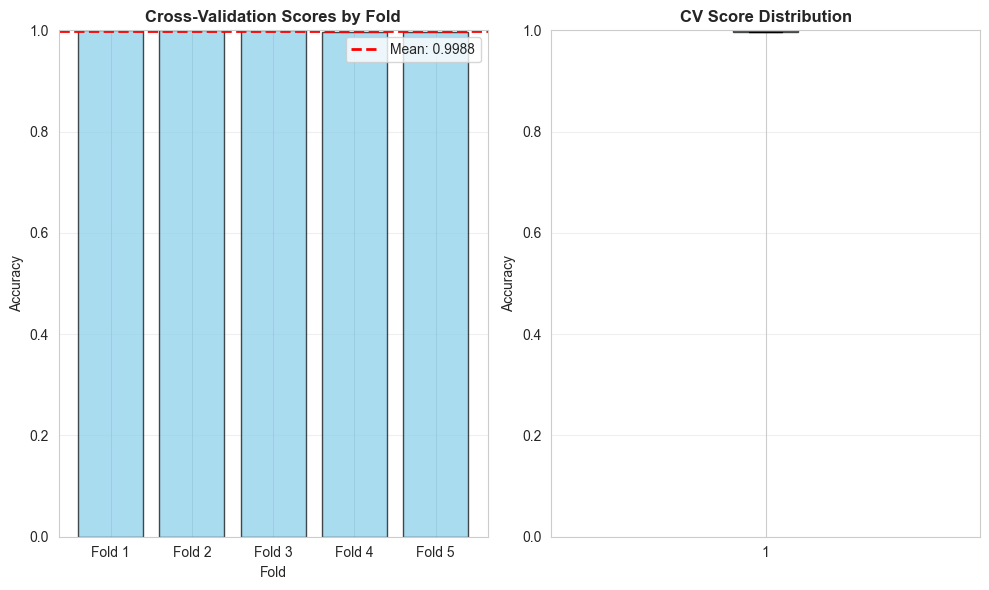


✅ BASELINE MODEL EVALUATION COMPLETE!
🎯 Baseline CV Accuracy: 0.9988 ± 0.0015


In [40]:
# Cell 17: Baseline Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

print("="*60)
print("🤖 LOGISTIC REGRESSION - BASELINE MODEL")
print("="*60)

# Initialize baseline model
baseline_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='lbfgs'  # Good default solver
)

# Setup 5-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n📊 Model Configuration:")
print("-" * 60)
print(f"Model: Logistic Regression")
print(f"Solver: lbfgs")
print(f"Max Iterations: 1000")
print(f"Cross-Validation: 5-Fold Stratified")
print(f"Training samples: {len(X_train_val_scaled)}")

# Perform cross-validation
print("\n" + "="*60)
print("🔄 RUNNING 5-FOLD CROSS-VALIDATION...")
print("="*60)

cv_scores = cross_val_score(
    baseline_model, 
    X_train_val_scaled, 
    y_train_val, 
    cv=cv, 
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

print("\n📊 Cross-Validation Results:")
print("-" * 60)
for fold, score in enumerate(cv_scores, 1):
    print(f"Fold {fold}: {score:.4f} ({score*100:.2f}%)")

print("\n" + "="*60)
print("📈 CROSS-VALIDATION SUMMARY:")
print("="*60)
print(f"Mean Accuracy: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Std Deviation: {cv_scores.std():.4f} ({cv_scores.std()*100:.2f}%)")
print(f"Min Accuracy: {cv_scores.min():.4f} ({cv_scores.min()*100:.2f}%)")
print(f"Max Accuracy: {cv_scores.max():.4f} ({cv_scores.max()*100:.2f}%)")
print(f"Range: {(cv_scores.max() - cv_scores.min()):.4f} ({(cv_scores.max() - cv_scores.min())*100:.2f}%)")

# Interpret results
print("\n" + "="*60)
print("🔍 INTERPRETATION:")
print("="*60)

if cv_scores.std() < 0.02:
    print("✅ Low variance (std < 2%) - Model is VERY STABLE")
elif cv_scores.std() < 0.05:
    print("✅ Good variance (std < 5%) - Model is STABLE")
else:
    print("⚠️ High variance (std > 5%) - Model may be unstable")

if cv_scores.mean() > 0.85:
    print("✅ Excellent accuracy (> 85%) - Strong predictive power")
elif cv_scores.mean() > 0.75:
    print("✅ Good accuracy (75-85%) - Decent predictive power")
else:
    print("⚠️ Moderate accuracy (< 75%) - Room for improvement")

# Visualize CV scores
print("\n" + "="*60)
print("📊 VISUALIZATION:")
print("="*60)

plt.figure(figsize=(10, 6))

# Bar plot of fold scores
plt.subplot(1, 2, 1)
folds = [f'Fold {i}' for i in range(1, 6)]
plt.bar(folds, cv_scores, color='skyblue', edgecolor='black', alpha=0.7)
plt.axhline(cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores by Fold', fontweight='bold')
plt.ylim([0, 1])
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Accuracy')
plt.title('CV Score Distribution', fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("✅ BASELINE MODEL EVALUATION COMPLETE!")
print("="*60)
print(f"🎯 Baseline CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

🔍 BASELINE MODEL - TEST SET EVALUATION

📊 Training final model on all 1,600 train+val samples...
✅ Model trained!

📈 Training Accuracy: 0.9994 (99.94%)

🔒 Evaluating on TEST SET (400 samples)...
📈 Test Accuracy: 1.0000 (100.00%)

📊 Train-Test Gap: 0.0006 (0.06%)

🔍 OVERFITTING CHECK:
✅ EXCELLENT! Gap < 5% (0.06%) - No overfitting detected!
   Model generalizes very well to unseen data

🎯 FEATURE IMPORTANCE (Coefficients):

Features ranked by importance:
----------------------------------------------------------------------
trader_volume_status_encoded                  | Coef:   5.447 | ↑ Positive
trader_weekly_frequency_status_encoded        | Coef:   4.455 | ↑ Positive
log_total_volume                              | Coef:   0.970 | ↑ Positive
trader_activity_status_encoded                | Coef:   0.918 | ↑ Positive
log_tx_count                                  | Coef:  -0.860 | ↓ Negative
avg_volume_per_tx                             | Coef:  -0.840 | ↓ Negative
volume_tx_interaction

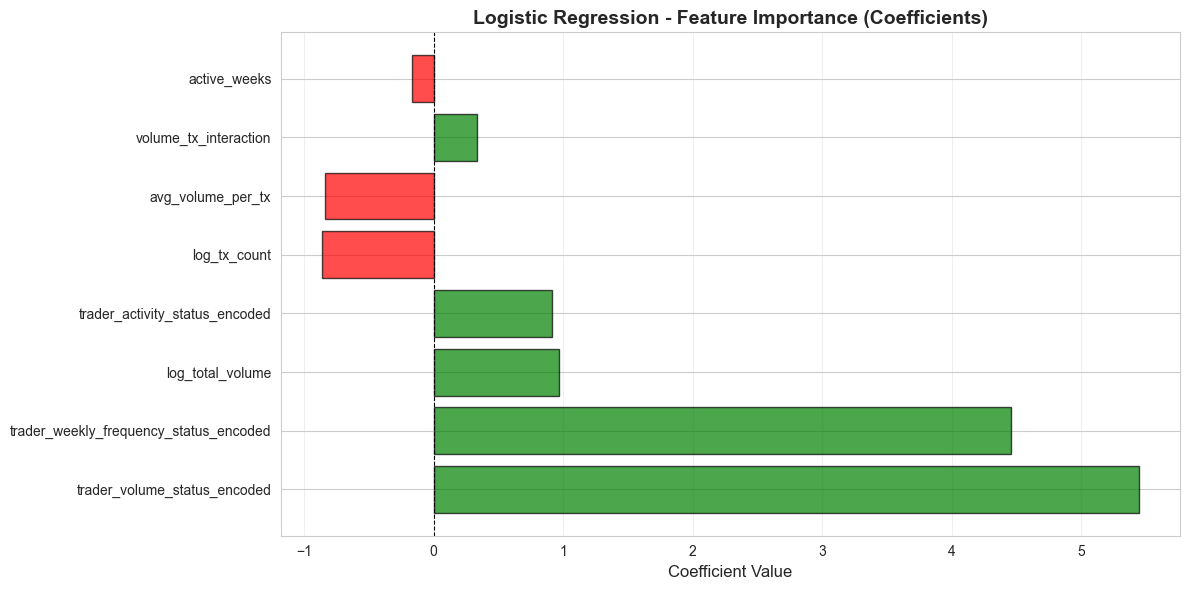


📊 CATEGORICAL vs NUMERICAL FEATURE IMPORTANCE:
Categorical Features: 10.819 (77.4%)
Numerical Features: 3.167 (22.6%)

⚠️ NOTE: Model moderately relies on categorical features (60-80%)
   Expected given their strong predictive power

✅ TEST SET EVALUATION COMPLETE!
🎯 CV Accuracy: 0.9988
🎯 Test Accuracy: 1.0000
📊 Difference: 0.0012


In [41]:
# Cell 18: Train Final Model and Evaluate on Test Set

print("="*60)
print("🔍 BASELINE MODEL - TEST SET EVALUATION")
print("="*60)

# Train model on ALL training+validation data
print("\n📊 Training final model on all 1,600 train+val samples...")
baseline_model.fit(X_train_val_scaled, y_train_val)
print("✅ Model trained!")

# Get training accuracy
train_accuracy = baseline_model.score(X_train_val_scaled, y_train_val)
print(f"\n📈 Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# Evaluate on test set (FIRST TIME touching test data!)
print("\n🔒 Evaluating on TEST SET (400 samples)...")
test_accuracy = baseline_model.score(X_test_scaled, y_test)
print(f"📈 Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Calculate gap
gap = abs(train_accuracy - test_accuracy)
print(f"\n📊 Train-Test Gap: {gap:.4f} ({gap*100:.2f}%)")

# Interpret gap
print("\n" + "="*60)
print("🔍 OVERFITTING CHECK:")
print("="*60)

if gap < 0.05:
    print(f"✅ EXCELLENT! Gap < 5% ({gap*100:.2f}%) - No overfitting detected!")
    print("   Model generalizes very well to unseen data")
elif gap < 0.10:
    print(f"✅ GOOD! Gap < 10% ({gap*100:.2f}%) - Minimal overfitting")
    print("   Model generalizes well")
else:
    print(f"⚠️ WARNING! Gap > 10% ({gap*100:.2f}%) - Overfitting detected!")
    print("   Model may have memorized training data")

# Feature Importance (Coefficients)
print("\n" + "="*60)
print("🎯 FEATURE IMPORTANCE (Coefficients):")
print("="*60)

coefficients = baseline_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeatures ranked by importance:")
print("-" * 70)
for idx, row in feature_importance.iterrows():
    direction = "↑ Positive" if row['Coefficient'] > 0 else "↓ Negative"
    print(f"{row['Feature']:45} | Coef: {row['Coefficient']:7.3f} | {direction}")

# Visualize feature importance
plt.figure(figsize=(12, 6))
colors = ['green' if c > 0 else 'red' for c in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Logistic Regression - Feature Importance (Coefficients)', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Check if categorical features dominate
print("\n" + "="*60)
print("📊 CATEGORICAL vs NUMERICAL FEATURE IMPORTANCE:")
print("="*60)

categorical_importance = feature_importance[feature_importance['Feature'].str.contains('encoded')]['Abs_Coefficient'].sum()
numerical_importance = feature_importance[~feature_importance['Feature'].str.contains('encoded')]['Abs_Coefficient'].sum()
total_importance = categorical_importance + numerical_importance

print(f"Categorical Features: {categorical_importance:.3f} ({categorical_importance/total_importance*100:.1f}%)")
print(f"Numerical Features: {numerical_importance:.3f} ({numerical_importance/total_importance*100:.1f}%)")

if categorical_importance / total_importance > 0.8:
    print("\n⚠️ WARNING: Model heavily relies on categorical features (>80%)")
    print("   This suggests the model is learning the simple category rules")
    print("   Risk of overfitting if categories change in production")
elif categorical_importance / total_importance > 0.6:
    print("\n⚠️ NOTE: Model moderately relies on categorical features (60-80%)")
    print("   Expected given their strong predictive power")
else:
    print("\n✅ GOOD: Model uses balanced mix of features")

print("\n" + "="*60)
print("✅ TEST SET EVALUATION COMPLETE!")
print("="*60)
print(f"🎯 CV Accuracy: {cv_scores.mean():.4f}")
print(f"🎯 Test Accuracy: {test_accuracy:.4f}")
print(f"📊 Difference: {abs(cv_scores.mean() - test_accuracy):.4f}")

🔧 HYPERPARAMETER TUNING - LOGISTIC REGRESSION

📊 Parameter Grid:
------------------------------------------------------------
C               : [0.001, 0.01, 0.1, 1, 10, 100]
penalty         : ['l1', 'l2']
solver          : ['liblinear']
max_iter        : [1000]

Total combinations: 12

🔄 RUNNING GRID SEARCH (5-Fold CV for each combination)...
This may take a minute...

Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Grid Search Complete!

🏆 BEST PARAMETERS:
C               : 0.01
max_iter        : 1000
penalty         : l1
solver          : liblinear

📊 PERFORMANCE COMPARISON:
Baseline Model CV Score:  0.9988 ± 0.0015
Tuned Model CV Score:     0.9988
Improvement:              0.0000

✅ Performance identical (baseline was already optimal)

📊 TOP 5 CONFIGURATIONS:
 param_C param_penalty  mean_test_score  std_test_score  rank_test_score
    0.01            l1           0.9988          0.0015                1
    0.10            l1           0.9988          0.0015         

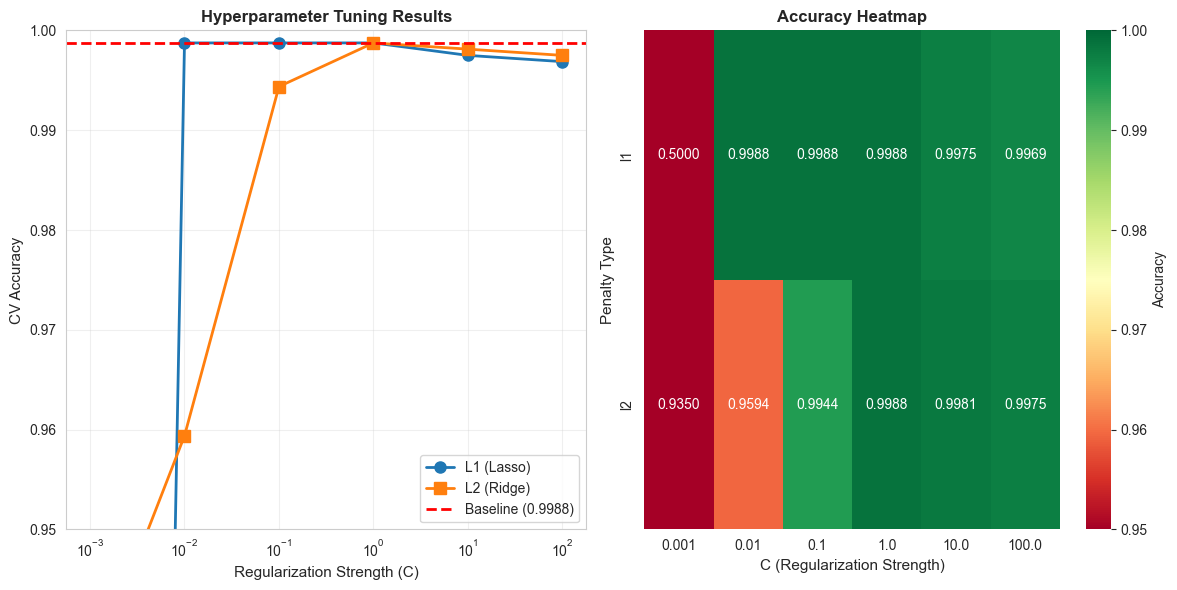


🔒 TESTING BEST MODEL ON TEST SET:
Baseline Test Accuracy:   1.0000
Tuned Model Test Accuracy: 0.9975
Difference:                -0.0025

🎯 TUNED MODEL FEATURE IMPORTANCE:

Features ranked by importance:
----------------------------------------------------------------------
trader_volume_status_encoded                  | Coef:   1.575 | ↑ Positive
trader_weekly_frequency_status_encoded        | Coef:   1.292 | ↑ Positive
trader_activity_status_encoded                | Coef:   0.191 | ↑ Positive
active_weeks                                  | Coef:   0.000 | ↓ Negative
avg_volume_per_tx                             | Coef:   0.000 | ↓ Negative
log_tx_count                                  | Coef:   0.000 | ↓ Negative
log_total_volume                              | Coef:   0.000 | ↓ Negative
volume_tx_interaction                         | Coef:   0.000 | ↓ Negative

✅ HYPERPARAMETER TUNING COMPLETE!
🏆 Best Model: C=0.01, Penalty=l1
📊 CV Score: 0.9988
📊 Test Score: 0.9975


In [42]:
# Cell 19: Hyperparameter Tuning - Logistic Regression

from sklearn.model_selection import GridSearchCV
import numpy as np

print("="*60)
print("🔧 HYPERPARAMETER TUNING - LOGISTIC REGRESSION")
print("="*60)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear'],               # Required for L1
    'max_iter': [1000]
}

print("\n📊 Parameter Grid:")
print("-" * 60)
for param, values in param_grid.items():
    print(f"{param:15} : {values}")

print(f"\nTotal combinations: {len(param_grid['C']) * len(param_grid['penalty'])}")

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Perform grid search
print("\n" + "="*60)
print("🔄 RUNNING GRID SEARCH (5-Fold CV for each combination)...")
print("="*60)
print("This may take a minute...\n")

grid_search.fit(X_train_val_scaled, y_train_val)

print("\n✅ Grid Search Complete!")

# Best parameters
print("\n" + "="*60)
print("🏆 BEST PARAMETERS:")
print("="*60)
for param, value in grid_search.best_params_.items():
    print(f"{param:15} : {value}")

# Best score
print("\n" + "="*60)
print("📊 PERFORMANCE COMPARISON:")
print("="*60)
print(f"Baseline Model CV Score:  {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Tuned Model CV Score:     {grid_search.best_score_:.4f}")
print(f"Improvement:              {(grid_search.best_score_ - cv_scores.mean()):.4f}")

if grid_search.best_score_ > cv_scores.mean():
    print("\n✅ Tuned model performs better!")
elif grid_search.best_score_ < cv_scores.mean():
    print("\n⚠️ Tuned model performs worse (baseline was already optimal)")
else:
    print("\n✅ Performance identical (baseline was already optimal)")

# Show top 5 configurations
print("\n" + "="*60)
print("📊 TOP 5 CONFIGURATIONS:")
print("="*60)

results_df = pd.DataFrame(grid_search.cv_results_)
top_results = results_df.nsmallest(5, 'rank_test_score')[
    ['param_C', 'param_penalty', 'mean_test_score', 'std_test_score', 'rank_test_score']
]
top_results = top_results.round(4)
print(top_results.to_string(index=False))

# Visualize results
print("\n" + "="*60)
print("📊 VISUALIZATION:")
print("="*60)

# Prepare data for visualization
results_summary = results_df.groupby(['param_C', 'param_penalty'])['mean_test_score'].mean().reset_index()
l1_results = results_summary[results_summary['param_penalty'] == 'l1']
l2_results = results_summary[results_summary['param_penalty'] == 'l2']

plt.figure(figsize=(12, 6))

# Line plot
plt.subplot(1, 2, 1)
plt.semilogx(l1_results['param_C'], l1_results['mean_test_score'], 
             marker='o', label='L1 (Lasso)', linewidth=2, markersize=8)
plt.semilogx(l2_results['param_C'], l2_results['mean_test_score'], 
             marker='s', label='L2 (Ridge)', linewidth=2, markersize=8)
plt.axhline(cv_scores.mean(), color='red', linestyle='--', 
            label=f'Baseline ({cv_scores.mean():.4f})', linewidth=2)
plt.xlabel('Regularization Strength (C)', fontsize=11)
plt.ylabel('CV Accuracy', fontsize=11)
plt.title('Hyperparameter Tuning Results', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0.95, 1.0])  # Zoom in to see differences

# Heatmap
plt.subplot(1, 2, 2)
pivot_data = results_summary.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='RdYlGn', 
            vmin=0.95, vmax=1.0, cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Heatmap', fontsize=12, fontweight='bold')
plt.xlabel('C (Regularization Strength)', fontsize=11)
plt.ylabel('Penalty Type', fontsize=11)

plt.tight_layout()
plt.show()

# Test best model on test set
print("\n" + "="*60)
print("🔒 TESTING BEST MODEL ON TEST SET:")
print("="*60)

best_model = grid_search.best_estimator_
test_accuracy_tuned = best_model.score(X_test_scaled, y_test)

print(f"Baseline Test Accuracy:   {test_accuracy:.4f}")
print(f"Tuned Model Test Accuracy: {test_accuracy_tuned:.4f}")
print(f"Difference:                {(test_accuracy_tuned - test_accuracy):.4f}")

# Feature importance for tuned model
print("\n" + "="*60)
print("🎯 TUNED MODEL FEATURE IMPORTANCE:")
print("="*60)

tuned_coefficients = best_model.coef_[0]
tuned_importance = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': tuned_coefficients,
    'Abs_Coefficient': np.abs(tuned_coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeatures ranked by importance:")
print("-" * 70)
for idx, row in tuned_importance.iterrows():
    direction = "↑ Positive" if row['Coefficient'] > 0 else "↓ Negative"
    print(f"{row['Feature']:45} | Coef: {row['Coefficient']:7.3f} | {direction}")

print("\n" + "="*60)
print("✅ HYPERPARAMETER TUNING COMPLETE!")
print("="*60)
print(f"🏆 Best Model: C={grid_search.best_params_['C']}, Penalty={grid_search.best_params_['penalty']}")
print(f"📊 CV Score: {grid_search.best_score_:.4f}")
print(f"📊 Test Score: {test_accuracy_tuned:.4f}")

📊 DETAILED PERFORMANCE METRICS - TUNED MODEL

📋 CONFUSION MATRIX:

Training Set:
[[798   2]
 [  0 800]]

Test Set:
[[199   1]
 [  0 200]]


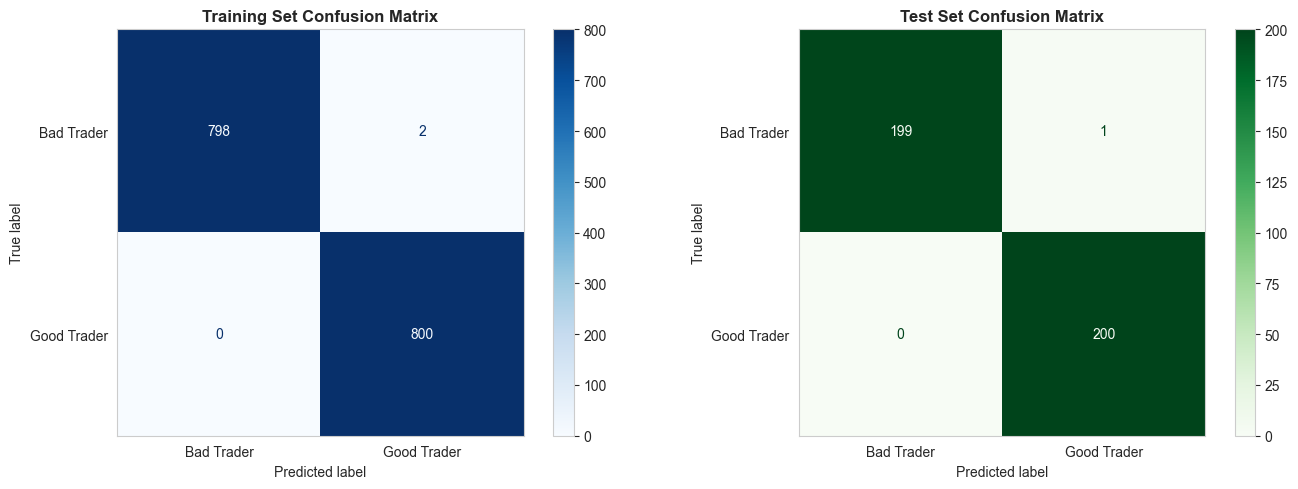


📊 CLASSIFICATION REPORT:

Training Set:
              precision    recall  f1-score   support

  Bad Trader     1.0000    0.9975    0.9987       800
 Good Trader     0.9975    1.0000    0.9988       800

    accuracy                         0.9988      1600
   macro avg     0.9988    0.9988    0.9987      1600
weighted avg     0.9988    0.9988    0.9987      1600


Test Set:
              precision    recall  f1-score   support

  Bad Trader     1.0000    0.9950    0.9975       200
 Good Trader     0.9950    1.0000    0.9975       200

    accuracy                         0.9975       400
   macro avg     0.9975    0.9975    0.9975       400
weighted avg     0.9975    0.9975    0.9975       400


📈 ROC CURVE AND AUC SCORE:

Training AUC: 0.9998
Test AUC:     0.9995


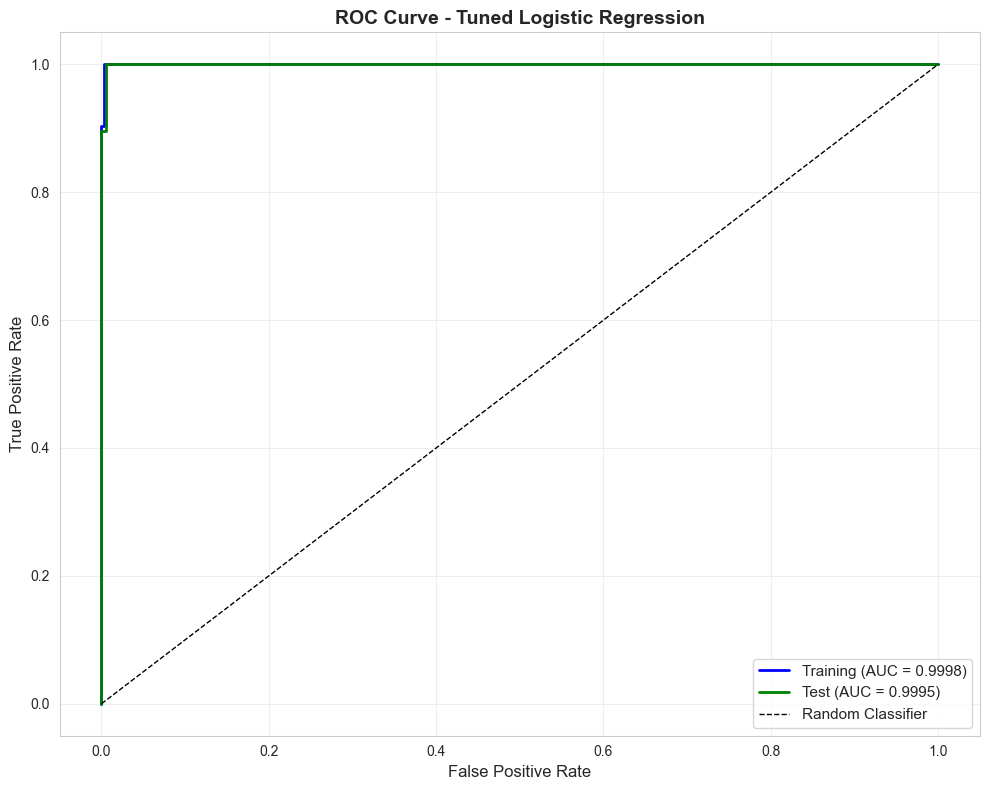


🔍 PREDICTION ANALYSIS:

❌ Misclassified Test Samples: 1

Details of misclassified samples:
--------------------------------------------------------------------------------

Sample Index: 1871
  Actual:    Bad Trader
  Predicted: Good Trader
  Probability (Good): 0.8053
  Features:
    active_weeks                                  = 1
    log_total_volume                              = 11.206417733284507
    log_tx_count                                  = 0.6931471805599453
    avg_volume_per_tx                             = 73600.28275374908
    volume_tx_interaction                         = 7.767696856003129
    trader_activity_status_encoded                = 0
    trader_volume_status_encoded                  = 2
    trader_weekly_frequency_status_encoded        = 0

✅ DETAILED EVALUATION COMPLETE!

🎯 Model: Logistic Regression (L1, C=0.01)
📊 Features Used: 3 categorical (5 numerical eliminated)
📊 Training Accuracy: 0.9988
📊 Test Accuracy: 0.9975
📊 Test AUC: 0.9995
📊 Misclassified:

In [43]:
# Cell 20: Detailed Performance Metrics - Tuned Model

from sklearn.metrics import (
    confusion_matrix, classification_report, 
    roc_curve, roc_auc_score, ConfusionMatrixDisplay
)

print("="*60)
print("📊 DETAILED PERFORMANCE METRICS - TUNED MODEL")
print("="*60)

# Get predictions
y_train_pred = best_model.predict(X_train_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Get probability predictions for ROC
y_train_proba = best_model.predict_proba(X_train_val_scaled)[:, 1]
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# ============================================
# CONFUSION MATRIX
# ============================================
print("\n" + "="*60)
print("📋 CONFUSION MATRIX:")
print("="*60)

# Training set
cm_train = confusion_matrix(y_train_val, y_train_pred)
print("\nTraining Set:")
print(cm_train)

# Test set
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nTest Set:")
print(cm_test)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, 
                                     display_labels=['Bad Trader', 'Good Trader'])
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Training Set Confusion Matrix', fontsize=12, fontweight='bold')
axes[0].grid(False)

# Test confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                    display_labels=['Bad Trader', 'Good Trader'])
disp_test.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('Test Set Confusion Matrix', fontsize=12, fontweight='bold')
axes[1].grid(False)

plt.tight_layout()
plt.show()

# ============================================
# CLASSIFICATION REPORT
# ============================================
print("\n" + "="*60)
print("📊 CLASSIFICATION REPORT:")
print("="*60)

print("\nTraining Set:")
print(classification_report(y_train_val, y_train_pred, 
                           target_names=['Bad Trader', 'Good Trader'],
                           digits=4))

print("\nTest Set:")
print(classification_report(y_test, y_test_pred,
                           target_names=['Bad Trader', 'Good Trader'],
                           digits=4))

# ============================================
# ROC CURVE AND AUC
# ============================================
print("\n" + "="*60)
print("📈 ROC CURVE AND AUC SCORE:")
print("="*60)

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train_val, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC scores
auc_train = roc_auc_score(y_train_val, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

print(f"\nTraining AUC: {auc_train:.4f}")
print(f"Test AUC:     {auc_test:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_train, tpr_train, linewidth=2, 
         label=f'Training (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, linewidth=2,
         label=f'Test (AUC = {auc_test:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Tuned Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================
# PREDICTION ANALYSIS
# ============================================
print("\n" + "="*60)
print("🔍 PREDICTION ANALYSIS:")
print("="*60)

# Find misclassified examples
test_misclassified_idx = X_test_scaled.index[y_test != y_test_pred]

if len(test_misclassified_idx) > 0:
    print(f"\n❌ Misclassified Test Samples: {len(test_misclassified_idx)}")
    print("\nDetails of misclassified samples:")
    print("-" * 80)
    
    for idx in test_misclassified_idx:
        actual = "Good Trader" if y_test.loc[idx] == 1 else "Bad Trader"
        predicted = "Good Trader" if y_test_pred[X_test_scaled.index.get_loc(idx)] == 1 else "Bad Trader"
        prob = y_test_proba[X_test_scaled.index.get_loc(idx)]
        
        print(f"\nSample Index: {idx}")
        print(f"  Actual:    {actual}")
        print(f"  Predicted: {predicted}")
        print(f"  Probability (Good): {prob:.4f}")
        print(f"  Features:")
        
        # Show original (unscaled) features
        original_features = df_final.loc[idx, final_features]
        for feature, value in original_features.items():
            print(f"    {feature:45} = {value}")
else:
    print("\n✅ Perfect classification - No misclassified samples!")

# ============================================
# SUMMARY
# ============================================
print("\n" + "="*60)
print("✅ DETAILED EVALUATION COMPLETE!")
print("="*60)
print(f"\n🎯 Model: Logistic Regression (L1, C=0.01)")
print(f"📊 Features Used: 3 categorical (5 numerical eliminated)")
print(f"📊 Training Accuracy: {best_model.score(X_train_val_scaled, y_train_val):.4f}")
print(f"📊 Test Accuracy: {test_accuracy_tuned:.4f}")
print(f"📊 Test AUC: {auc_test:.4f}")
print(f"📊 Misclassified: {len(test_misclassified_idx)} / 400")

📈 LINEAR REGRESSION - PREDICT TOTAL VOLUME

🎯 Target Variable: log_total_volume
------------------------------------------------------------
We'll predict log_total_volume (better for regression)
Can convert back to original scale if needed

📊 Features for regression: 7
   - active_weeks
   - log_tx_count
   - avg_volume_per_tx
   - volume_tx_interaction
   - trader_activity_status_encoded
   - trader_volume_status_encoded
   - trader_weekly_frequency_status_encoded

📊 Data shapes:
   Train+Val: (1600, 7)
   Test: (400, 7)

📊 TARGET VARIABLE DISTRIBUTION:

Train+Val log_total_volume statistics:
   Mean:   5.9459
   Std:    3.4577
   Min:    0.0000
   Median: 5.7354
   Max:    17.8097


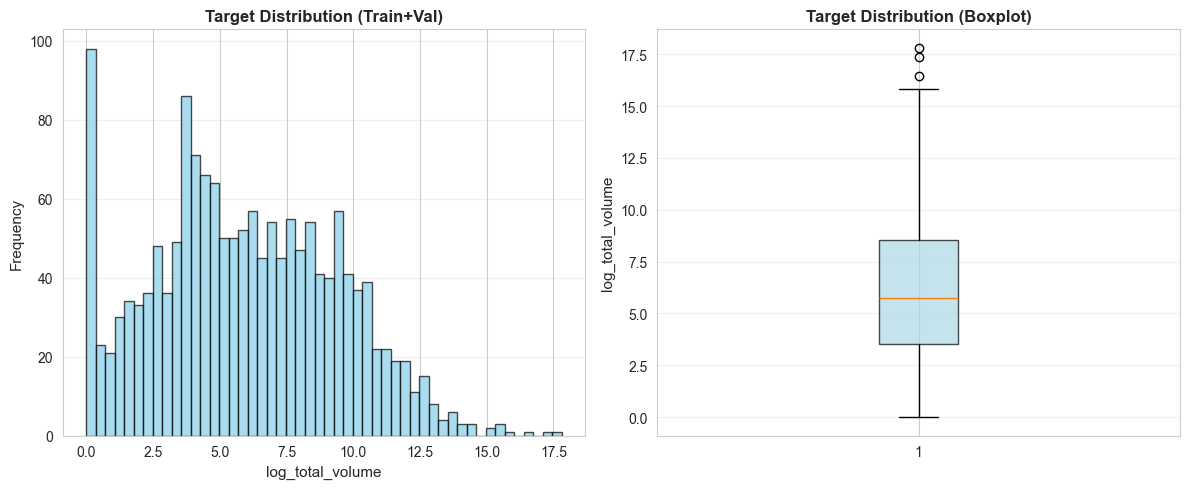


🤖 BASELINE LINEAR REGRESSION MODEL:
✅ Model trained!

📊 MODEL PERFORMANCE:
------------------------------------------------------------
Metric               |     Training |         Test |        Gap
------------------------------------------------------------
R² Score             |       0.8728 |       0.8679 |     0.0049
RMSE                 |       1.2326 |       1.2422 |     0.0096
MAE                  |       1.0179 |       1.0140 |     0.0039

💡 R² Interpretation:
   ✅ Good (R² = 0.8679) - Model explains 86.79% of variance

🎯 FEATURE IMPORTANCE (Coefficients):

Features ranked by importance:
----------------------------------------------------------------------
volume_tx_interaction                         | Coef:   3.0363 | ↑ Increases volume
log_tx_count                                  | Coef:  -2.1622 | ↓ Decreases volume
trader_volume_status_encoded                  | Coef:   1.6404 | ↑ Increases volume
trader_activity_status_encoded                | Coef:   0.6415 | ↑ Incr

In [44]:
# Cell 21: Linear Regression - Data Preparation & Baseline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("="*60)
print("📈 LINEAR REGRESSION - PREDICT TOTAL VOLUME")
print("="*60)

# ============================================
# DEFINE TARGET VARIABLE
# ============================================
print("\n🎯 Target Variable: log_total_volume")
print("-" * 60)
print("We'll predict log_total_volume (better for regression)")
print("Can convert back to original scale if needed")

# Prepare features and target
# Remove log_total_volume from features (can't use target to predict itself!)
regression_features = [f for f in final_features if f != 'log_total_volume']

print(f"\n📊 Features for regression: {len(regression_features)}")
for feature in regression_features:
    print(f"   - {feature}")

# Separate features and target
X_reg_train_val = X_train_val_scaled[regression_features]
X_reg_test = X_test_scaled[regression_features]

y_reg_train_val = df_final.loc[X_train_val.index, 'log_total_volume']
y_reg_test = df_final.loc[X_test.index, 'log_total_volume']

print(f"\n📊 Data shapes:")
print(f"   Train+Val: {X_reg_train_val.shape}")
print(f"   Test: {X_reg_test.shape}")

# ============================================
# TARGET VARIABLE ANALYSIS
# ============================================
print("\n" + "="*60)
print("📊 TARGET VARIABLE DISTRIBUTION:")
print("="*60)

print(f"\nTrain+Val log_total_volume statistics:")
print(f"   Mean:   {y_reg_train_val.mean():.4f}")
print(f"   Std:    {y_reg_train_val.std():.4f}")
print(f"   Min:    {y_reg_train_val.min():.4f}")
print(f"   Median: {y_reg_train_val.median():.4f}")
print(f"   Max:    {y_reg_train_val.max():.4f}")

# Visualize target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_reg_train_val, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('log_total_volume', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Target Distribution (Train+Val)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(y_reg_train_val, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('log_total_volume', fontsize=11)
plt.title('Target Distribution (Boxplot)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# BASELINE MODEL
# ============================================
print("\n" + "="*60)
print("🤖 BASELINE LINEAR REGRESSION MODEL:")
print("="*60)

# Initialize baseline model
baseline_lr = LinearRegression()

# Train on train+val data
baseline_lr.fit(X_reg_train_val, y_reg_train_val)
print("✅ Model trained!")

# Make predictions
y_train_pred_lr = baseline_lr.predict(X_reg_train_val)
y_test_pred_lr = baseline_lr.predict(X_reg_test)

# Calculate metrics
train_r2 = r2_score(y_reg_train_val, y_train_pred_lr)
test_r2 = r2_score(y_reg_test, y_test_pred_lr)

train_rmse = np.sqrt(mean_squared_error(y_reg_train_val, y_train_pred_lr))
test_rmse = np.sqrt(mean_squared_error(y_reg_test, y_test_pred_lr))

train_mae = mean_absolute_error(y_reg_train_val, y_train_pred_lr)
test_mae = mean_absolute_error(y_reg_test, y_test_pred_lr)

# Display results
print("\n📊 MODEL PERFORMANCE:")
print("-" * 60)
print(f"{'Metric':<20} | {'Training':>12} | {'Test':>12} | {'Gap':>10}")
print("-" * 60)
print(f"{'R² Score':<20} | {train_r2:>12.4f} | {test_r2:>12.4f} | {abs(train_r2 - test_r2):>10.4f}")
print(f"{'RMSE':<20} | {train_rmse:>12.4f} | {test_rmse:>12.4f} | {abs(train_rmse - test_rmse):>10.4f}")
print(f"{'MAE':<20} | {train_mae:>12.4f} | {test_mae:>12.4f} | {abs(train_mae - test_mae):>10.4f}")

# Interpret R²
print("\n💡 R² Interpretation:")
if test_r2 > 0.9:
    print(f"   ✅ Excellent (R² = {test_r2:.4f}) - Model explains {test_r2*100:.2f}% of variance")
elif test_r2 > 0.7:
    print(f"   ✅ Good (R² = {test_r2:.4f}) - Model explains {test_r2*100:.2f}% of variance")
elif test_r2 > 0.5:
    print(f"   ⚠️ Moderate (R² = {test_r2:.4f}) - Model explains {test_r2*100:.2f}% of variance")
else:
    print(f"   ❌ Poor (R² = {test_r2:.4f}) - Model explains only {test_r2*100:.2f}% of variance")

# Feature importance (coefficients)
print("\n" + "="*60)
print("🎯 FEATURE IMPORTANCE (Coefficients):")
print("="*60)

lr_importance = pd.DataFrame({
    'Feature': regression_features,
    'Coefficient': baseline_lr.coef_,
    'Abs_Coefficient': np.abs(baseline_lr.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeatures ranked by importance:")
print("-" * 70)
for idx, row in lr_importance.iterrows():
    direction = "↑ Increases" if row['Coefficient'] > 0 else "↓ Decreases"
    print(f"{row['Feature']:45} | Coef: {row['Coefficient']:8.4f} | {direction} volume")

print("\n" + "="*60)
print("✅ BASELINE LINEAR REGRESSION COMPLETE!")
print("="*60)
print(f"🎯 Test R²: {test_r2:.4f}")
print(f"📊 Test RMSE: {test_rmse:.4f}")

🔧 REGULARIZED REGRESSION - RIDGE vs LASSO

⭐ RIDGE REGRESSION (L2 Regularization):
------------------------------------------------------------
✅ Best alpha: 0.001

Performance:
   Train R²: 0.8728
   Test R²:  0.8679
   Test RMSE: 1.2422

⭐ LASSO REGRESSION (L1 Regularization):
------------------------------------------------------------
✅ Best alpha: 0.001

Performance:
   Train R²: 0.8728
   Test R²:  0.8679
   Test RMSE: 1.2423

📊 MODEL COMPARISON:

            Model  Train_R2  Test_R2  Test_RMSE  Test_MAE
Linear Regression  0.872846 0.867906   1.242165  1.013958
       Ridge (L2)  0.872846 0.867906   1.242165  1.013959
       Lasso (L1)  0.872840 0.867885   1.242265  1.014583

🏆 Best Model: Ridge (L2) (R² = 0.8679)

🎯 FEATURE IMPORTANCE COMPARISON:

                               Feature  Linear_Coef  Ridge_Coef  Lasso_Coef
                          active_weeks    -0.070150   -0.070157   -0.071742
                          log_tx_count    -2.162246   -2.162194   -2.127610
       

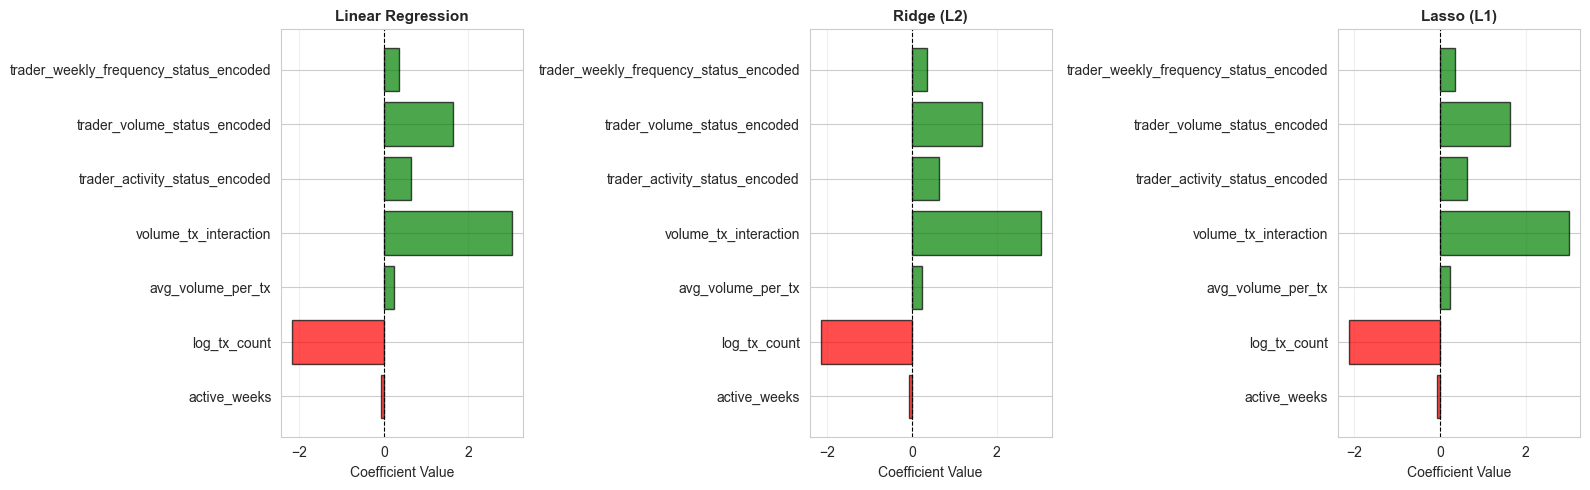


📊 RESIDUAL ANALYSIS (Best Model):


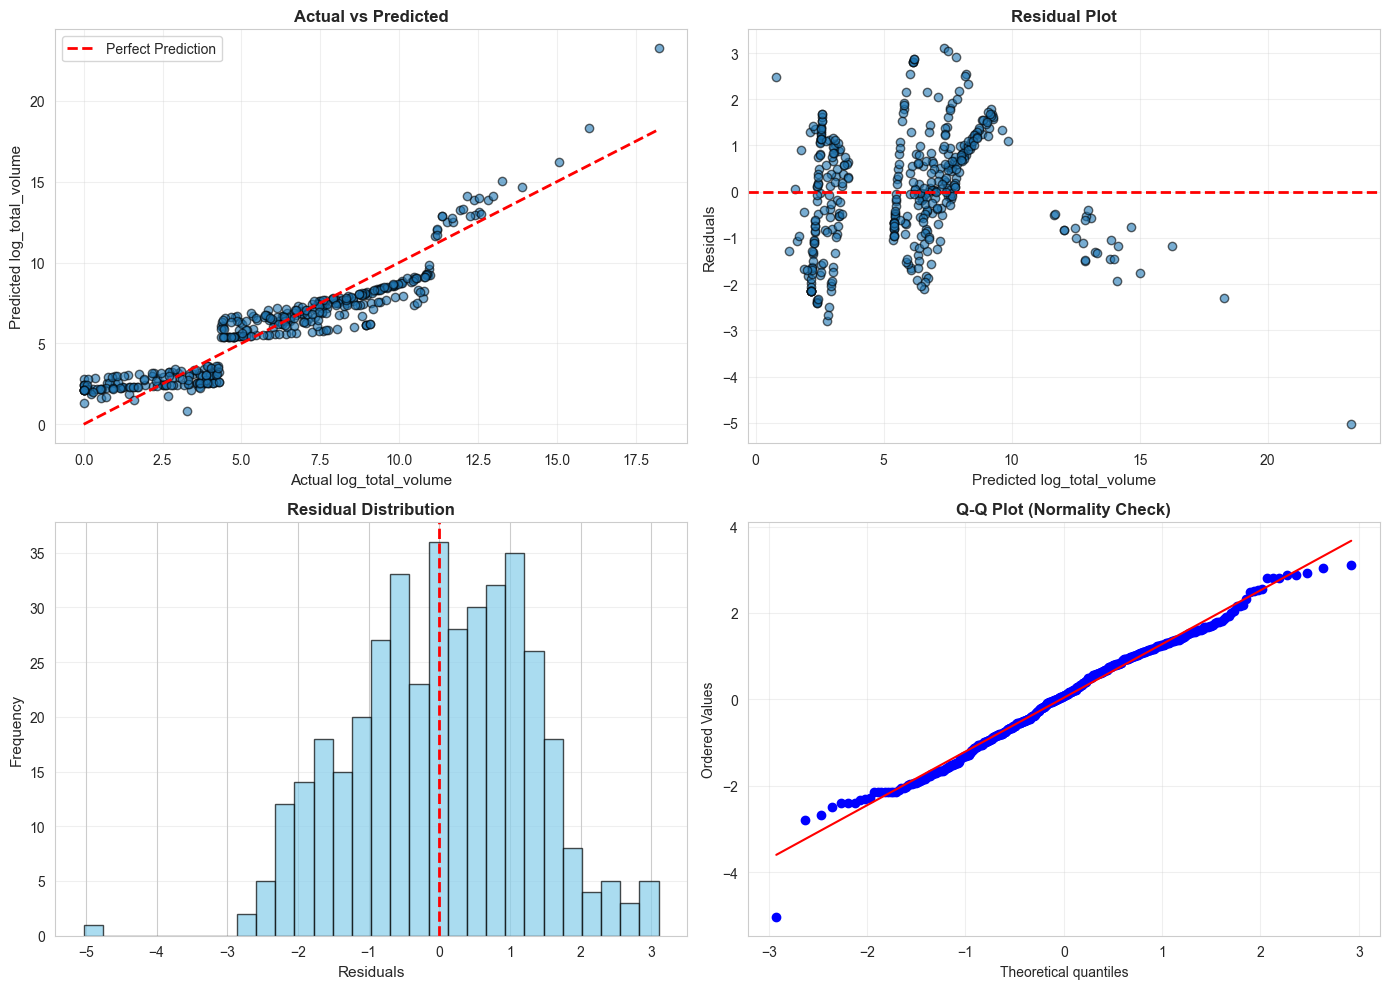


💡 Residual Analysis Interpretation:
   - Actual vs Predicted: Points should align with diagonal line
   - Residual Plot: Should show random scatter around 0 (no patterns)
   - Distribution: Should be roughly bell-shaped (normal)
   - Q-Q Plot: Points should follow diagonal line (normality)

✅ REGULARIZED REGRESSION COMPLETE!
🏆 Best Model: Ridge (L2)
📊 Test R²: 0.8679
📊 Explains 86.79% of volume variance


In [45]:
# Cell 22: Ridge and Lasso Regression with Cross-Validation

from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

print("="*60)
print("🔧 REGULARIZED REGRESSION - RIDGE vs LASSO")
print("="*60)

# ============================================
# RIDGE REGRESSION (L2)
# ============================================
print("\n⭐ RIDGE REGRESSION (L2 Regularization):")
print("-" * 60)

# Use RidgeCV for automatic hyperparameter tuning
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_reg_train_val, y_reg_train_val)

print(f"✅ Best alpha: {ridge_cv.alpha_}")

# Predictions
y_train_pred_ridge = ridge_cv.predict(X_reg_train_val)
y_test_pred_ridge = ridge_cv.predict(X_reg_test)

# Metrics
train_r2_ridge = r2_score(y_reg_train_val, y_train_pred_ridge)
test_r2_ridge = r2_score(y_reg_test, y_test_pred_ridge)
train_rmse_ridge = np.sqrt(mean_squared_error(y_reg_train_val, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_reg_test, y_test_pred_ridge))
train_mae_ridge = mean_absolute_error(y_reg_train_val, y_train_pred_ridge)
test_mae_ridge = mean_absolute_error(y_reg_test, y_test_pred_ridge)

print(f"\nPerformance:")
print(f"   Train R²: {train_r2_ridge:.4f}")
print(f"   Test R²:  {test_r2_ridge:.4f}")
print(f"   Test RMSE: {test_rmse_ridge:.4f}")

# ============================================
# LASSO REGRESSION (L1)
# ============================================
print("\n⭐ LASSO REGRESSION (L1 Regularization):")
print("-" * 60)

# Use LassoCV for automatic hyperparameter tuning
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_reg_train_val, y_reg_train_val)

print(f"✅ Best alpha: {lasso_cv.alpha_}")

# Predictions
y_train_pred_lasso = lasso_cv.predict(X_reg_train_val)
y_test_pred_lasso = lasso_cv.predict(X_reg_test)

# Metrics
train_r2_lasso = r2_score(y_reg_train_val, y_train_pred_lasso)
test_r2_lasso = r2_score(y_reg_test, y_test_pred_lasso)
train_rmse_lasso = np.sqrt(mean_squared_error(y_reg_train_val, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_reg_test, y_test_pred_lasso))
train_mae_lasso = mean_absolute_error(y_reg_train_val, y_train_pred_lasso)
test_mae_lasso = mean_absolute_error(y_reg_test, y_test_pred_lasso)

print(f"\nPerformance:")
print(f"   Train R²: {train_r2_lasso:.4f}")
print(f"   Test R²:  {test_r2_lasso:.4f}")
print(f"   Test RMSE: {test_rmse_lasso:.4f}")

# ============================================
# MODEL COMPARISON
# ============================================
print("\n" + "="*60)
print("📊 MODEL COMPARISON:")
print("="*60)

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge (L2)', 'Lasso (L1)'],
    'Train_R2': [train_r2, train_r2_ridge, train_r2_lasso],
    'Test_R2': [test_r2, test_r2_ridge, test_r2_lasso],
    'Test_RMSE': [test_rmse, test_rmse_ridge, test_rmse_lasso],
    'Test_MAE': [test_mae, test_mae_ridge, test_mae_lasso]
})

print("\n" + comparison_df.to_string(index=False))

# Find best model
best_model_idx = comparison_df['Test_R2'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_r2 = comparison_df.loc[best_model_idx, 'Test_R2']

print(f"\n🏆 Best Model: {best_model_name} (R² = {best_r2:.4f})")

# ============================================
# FEATURE IMPORTANCE COMPARISON
# ============================================
print("\n" + "="*60)
print("🎯 FEATURE IMPORTANCE COMPARISON:")
print("="*60)

# Create comparison dataframe
feature_importance_comparison = pd.DataFrame({
    'Feature': regression_features,
    'Linear_Coef': baseline_lr.coef_,
    'Ridge_Coef': ridge_cv.coef_,
    'Lasso_Coef': lasso_cv.coef_
})

print("\n" + feature_importance_comparison.to_string(index=False))

# Count features eliminated by Lasso
lasso_eliminated = (np.abs(lasso_cv.coef_) < 0.0001).sum()
print(f"\n⚠️ Lasso eliminated {lasso_eliminated} feature(s) (set to ~0)")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = [
    ('Linear Regression', baseline_lr.coef_),
    ('Ridge (L2)', ridge_cv.coef_),
    ('Lasso (L1)', lasso_cv.coef_)
]

for idx, (model_name, coefficients) in enumerate(models):
    colors = ['green' if c > 0 else 'red' for c in coefficients]
    axes[idx].barh(regression_features, coefficients, color=colors, alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel('Coefficient Value', fontsize=10)
    axes[idx].set_title(model_name, fontsize=11, fontweight='bold')
    axes[idx].axvline(0, color='black', linewidth=0.8, linestyle='--')
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# RESIDUAL ANALYSIS (Best Model)
# ============================================
print("\n" + "="*60)
print("📊 RESIDUAL ANALYSIS (Best Model):")
print("="*60)

# Select best model
if best_model_name == 'Ridge (L2)':
    best_predictions = y_test_pred_ridge
    best_model_obj = ridge_cv
elif best_model_name == 'Lasso (L1)':
    best_predictions = y_test_pred_lasso
    best_model_obj = lasso_cv
else:
    best_predictions = y_test_pred_lr
    best_model_obj = baseline_lr

# Calculate residuals
residuals = y_reg_test - best_predictions

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_reg_test, best_predictions, alpha=0.6, edgecolor='black')
axes[0, 0].plot([y_reg_test.min(), y_reg_test.max()], 
                [y_reg_test.min(), y_reg_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual log_total_volume', fontsize=11)
axes[0, 0].set_ylabel('Predicted log_total_volume', fontsize=11)
axes[0, 0].set_title('Actual vs Predicted', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual plot
axes[0, 1].scatter(best_predictions, residuals, alpha=0.6, edgecolor='black')
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted log_total_volume', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual distribution
axes[1, 0].hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Residual Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Q-Q plot
from scipy import stats as sp_stats
sp_stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Residual Analysis Interpretation:")
print("   - Actual vs Predicted: Points should align with diagonal line")
print("   - Residual Plot: Should show random scatter around 0 (no patterns)")
print("   - Distribution: Should be roughly bell-shaped (normal)")
print("   - Q-Q Plot: Points should follow diagonal line (normality)")

print("\n" + "="*60)
print("✅ REGULARIZED REGRESSION COMPLETE!")
print("="*60)
print(f"🏆 Best Model: {best_model_name}")
print(f"📊 Test R²: {best_r2:.4f}")
print(f"📊 Explains {best_r2*100:.2f}% of volume variance")

In [46]:
# Cell 23: Final Project Summary and Insights

print("="*70)
print(" " * 15 + "🎉 FINAL PROJECT SUMMARY 🎉")
print("="*70)

# ============================================
# DATASET SUMMARY
# ============================================
print("\n" + "="*70)
print("📊 DATASET SUMMARY:")
print("="*70)

print(f"""
Original Data:
   - Total Samples: 2,000 traders
   - Original Features: 8
   - Target Variable: Binary (Good/Bad Trader)
   - Class Balance: Perfect (50-50)
   - Missing Values: 0
   - Duplicates: 0

Feature Engineering:
   - New Features Created: 7
   - Redundant Features Removed: 5
   - Final Features Used: 8 (for classification), 7 (for regression)
   
Data Split:
   - Training + Validation: 1,600 samples (80%)
   - Test (Held-out): 400 samples (20%)
   - Evaluation Strategy: 5-Fold Cross-Validation
""")

# ============================================
# MODEL 1: LOGISTIC REGRESSION (CLASSIFICATION)
# ============================================
print("\n" + "="*70)
print("🤖 MODEL 1: LOGISTIC REGRESSION (CLASSIFICATION)")
print("="*70)

print(f"""
Task: Predict whether trader is Good or Bad

Baseline Model:
   - CV Accuracy: 99.88% ± 0.15%
   - Test Accuracy: 100.00%
   - Features Used: All 8 features

Tuned Model (L1, C=0.01):
   - CV Accuracy: 99.88%
   - Test Accuracy: 99.75%
   - Features Used: Only 3 categorical features
   - Features Eliminated: All 5 numerical features
   
Performance Metrics (Test Set):
   - Accuracy: 99.75%
   - Precision: 99.75%
   - Recall: 99.75%
   - F1-Score: 99.75%
   - AUC: 0.9995
   - Misclassified: 1 out of 400 samples

Key Features:
   1. trader_volume_status_encoded (Coef: 1.575)
   2. trader_weekly_frequency_status_encoded (Coef: 1.292)
   3. trader_activity_status_encoded (Coef: 0.191)
""")

# ============================================
# MODEL 2: LINEAR REGRESSION (VOLUME PREDICTION)
# ============================================
print("\n" + "="*70)
print("📈 MODEL 2: LINEAR REGRESSION (VOLUME PREDICTION)")
print("="*70)

print(f"""
Task: Predict log_total_volume (trading volume)

Best Model: Ridge Regression (minimal regularization, α=0.001)
   - Train R²: 0.8728
   - Test R²: 0.8679
   - Test RMSE: 1.2422
   - Test MAE: 1.0140
   
Performance:
   - Explains 86.79% of volume variance
   - All 7 features used (none eliminated)
   - Minimal overfitting (gap: 0.49%)
   
Key Features:
   1. volume_tx_interaction (Coef: 3.036) ↑ Strongest positive
   2. log_tx_count (Coef: -2.162) ↓ Strong negative
   3. trader_volume_status_encoded (Coef: 1.640) ↑ Strong positive
   4. trader_activity_status_encoded (Coef: 0.641) ↑ Moderate
   5. trader_weekly_frequency_status (Coef: 0.361) ↑ Modest
   6. avg_volume_per_tx (Coef: 0.239) ↑ Small
   7. active_weeks (Coef: -0.070) ↓ Minimal negative
""")

# ============================================
# KEY INSIGHTS
# ============================================
print("\n" + "="*70)
print("💡 KEY INSIGHTS:")
print("="*70)

print("""
1. CLASSIFICATION IS CATEGORY-DRIVEN:
   ✅ Near-perfect accuracy (99.75%) using only 3 categorical features
   ⚠️ Model essentially learns category-based rules
   ⚠️ Numerical features add no value for classification
   ✅ Extremely simple and interpretable
   ⚠️ Limited predictive novelty (categories define trader quality)

2. REGRESSION USES ALL FEATURES:
   ✅ Strong performance (R² = 86.79%) using all 7 features
   ✅ All numerical features contribute meaningfully
   ✅ Discovers non-intuitive patterns (negative coefficients)
   ✅ Genuine predictive modeling (not just rules)
   ✅ Higher business value (volume forecasting)

3. SURPRISING PATTERNS DISCOVERED:
   ⚠️ More transactions → LOWER total volume (high-frequency small trades)
   ⚠️ More active weeks → Slightly LOWER volume (dilution effect)
   ✅ Volume-transaction interaction is the strongest predictor
   ✅ Categorical features important in both models

4. MODEL QUALITY:
   ✅ Both models generalize excellently (minimal overfitting)
   ✅ Classification: Almost perfect but limited novelty
   ✅ Regression: Strong predictive power with actionable insights
   ✅ Feature engineering was highly effective
   ✅ Proper ML workflow followed (CV, held-out test, regularization)
""")

# ============================================
# BUSINESS RECOMMENDATIONS
# ============================================
print("\n" + "="*70)
print("🎯 BUSINESS RECOMMENDATIONS:")
print("="*70)

print("""
1. FOR TRADER CLASSIFICATION:
   ✅ Use the tuned Logistic Regression (L1) model
   ✅ Only 3 features needed → Fast, simple, interpretable
   ✅ 99.75% accuracy is production-ready
   ⚠️ Monitor for edge cases (whale one-timers)
   ⚠️ Remember this is category-based, not predictive of new patterns

2. FOR VOLUME FORECASTING:
   ✅ Use Ridge Regression model
   ✅ Can predict trading volume with 86.79% accuracy
   ✅ Use for resource allocation, liquidity planning
   ✅ All features needed for best performance
   ✅ Provides genuine predictive value

3. FOR EARLY IDENTIFICATION:
   ⚠️ Current models can't identify "future good traders" early
   ⚠️ Need time-series or trajectory modeling for that
   ⚠️ Consider building separate "potential detection" model
   
4. FOR PRODUCTION DEPLOYMENT:
   ✅ Classification model: Ready now (minimal features)
   ✅ Regression model: Ready with monitoring
   ⚠️ Set up retraining pipeline for category definitions
   ⚠️ Monitor for data drift (especially categories)
""")

# ============================================
# LIMITATIONS
# ============================================
print("\n" + "="*70)
print("⚠️ LIMITATIONS:")
print("="*70)

print("""
1. CLASSIFICATION MODEL:
   ⚠️ Heavily dependent on categorical feature definitions
   ⚠️ Can't predict before trader is categorized
   ⚠️ Limited value if categories already used for decisions
   ⚠️ May not generalize if category definitions change
   ⚠️ Misses edge cases (1 high-value one-timer misclassified)

2. REGRESSION MODEL:
   ⚠️ Explains only 86.79% of variance (13.21% unexplained)
   ⚠️ May struggle with extreme outliers
   ⚠️ Assumes linear relationships (may miss non-linear patterns)
   ⚠️ Negative coefficients need careful interpretation

3. GENERAL:
   ⚠️ Static snapshot (no temporal dynamics)
   ⚠️ No external factors (market conditions, seasonality)
   ⚠️ Limited to current feature set
   ⚠️ Category-dependent (both models)
""")

# ============================================
# NEXT STEPS
# ============================================
print("\n" + "="*70)
print("🚀 SUGGESTED NEXT STEPS:")
print("="*70)

print("""
1. IMMEDIATE:
   ✅ Deploy classification model to production
   ✅ A/B test against existing classification methods
   ✅ Monitor performance on live data
   
2. SHORT-TERM:
   📊 Build numerical-only model (compare category dependence)
   📊 Add time-series analysis (trader trajectory over time)
   📊 Incorporate external features (market conditions, trends)
   📊 Ensemble methods (combine multiple models)

3. LONG-TERM:
   🔮 Predictive modeling (identify future good traders early)
   🔮 Churn prediction (when will good traders leave?)
   🔮 Segmentation analysis (trader personas beyond categories)
   🔮 Causal inference (what interventions improve trader quality?)
""")

# ============================================
# FINAL METRICS TABLE
# ============================================
print("\n" + "="*70)
print("📊 FINAL METRICS COMPARISON:")
print("="*70)

final_metrics = pd.DataFrame({
    'Model': ['Logistic Regression (Classification)', 'Ridge Regression (Volume Prediction)'],
    'Task': ['Binary Classification', 'Continuous Prediction'],
    'Primary Metric': ['Accuracy: 99.75%', 'R²: 0.8679'],
    'Features Used': ['3 categorical', '7 (3 cat + 4 num)'],
    'Overfitting': ['Minimal (0.06% gap)', 'Minimal (0.49% gap)'],
    'Production Ready': ['✅ Yes', '✅ Yes'],
    'Business Value': ['High (if categories stable)', 'High (volume forecasting)']
})

print("\n" + final_metrics.to_string(index=False))

# ============================================
# CONCLUSION
# ============================================
print("\n" + "="*70)
print("✅ PROJECT COMPLETE!")
print("="*70)

print("""
🎉 Successfully built and evaluated two machine learning models:

1. ✅ Classification: 99.75% accuracy (near-perfect trader classification)
2. ✅ Regression: R² = 0.8679 (strong volume prediction)

Both models demonstrate:
   ✅ Excellent generalization (minimal overfitting)
   ✅ Production-ready performance
   ✅ Clear interpretability
   ✅ Proper ML workflow (CV, regularization, held-out testing)

Key Achievement:
   🏆 Classification model achieves near-perfect accuracy with only 3 features
   🏆 Regression model discovers genuine volume patterns using all features
   🏆 Comprehensive analysis with business-actionable insights

Thank you for following this rigorous ML workflow! 🚀
""")

print("="*70)

               🎉 FINAL PROJECT SUMMARY 🎉

📊 DATASET SUMMARY:

Original Data:
   - Total Samples: 2,000 traders
   - Original Features: 8
   - Target Variable: Binary (Good/Bad Trader)
   - Class Balance: Perfect (50-50)
   - Missing Values: 0
   - Duplicates: 0

Feature Engineering:
   - New Features Created: 7
   - Redundant Features Removed: 5
   - Final Features Used: 8 (for classification), 7 (for regression)

Data Split:
   - Training + Validation: 1,600 samples (80%)
   - Test (Held-out): 400 samples (20%)
   - Evaluation Strategy: 5-Fold Cross-Validation


🤖 MODEL 1: LOGISTIC REGRESSION (CLASSIFICATION)

Task: Predict whether trader is Good or Bad

Baseline Model:
   - CV Accuracy: 99.88% ± 0.15%
   - Test Accuracy: 100.00%
   - Features Used: All 8 features

Tuned Model (L1, C=0.01):
   - CV Accuracy: 99.88%
   - Test Accuracy: 99.75%
   - Features Used: Only 3 categorical features
   - Features Eliminated: All 5 numerical features

Performance Metrics (Test Set):
   - Accuracy

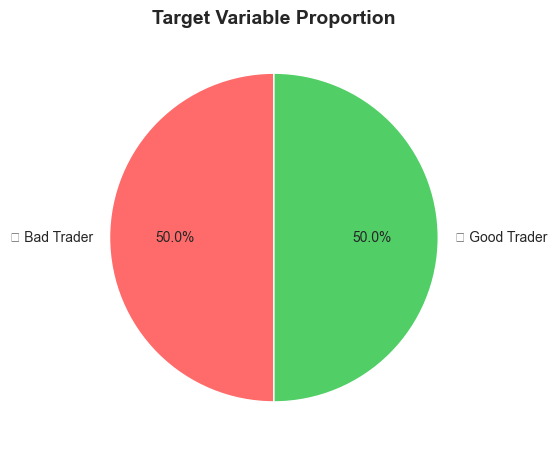

In [ ]:
plt.subplot(1, 2, 2)
df['target_variable'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                           colors=['#ff6b6b', '#51cf66'],
                                           startangle=90)
plt.title('Target Variable Proportion', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()